In [1]:
# Importing the libraries 

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True) 
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import missingno as msno
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')


from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing


## Food and agriculture data
FAOSTAT provides free access to food and agriculture data for over 245 countries and territories and covers all FAO regional groupings from 1961 to the most recent year available.

In [2]:
df_ireland = pd.read_csv('data_ireland.csv')
# looking at the dataset
df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


## Missing value

In [3]:
df_ireland.describe()

# We can see that we having varying counts for each of the features within the dataframe. 
# This provides an initial indication that not all values are present.

,Area Code (M49),Element Code,Year Code,Year,Value
count,9751.0,9751.000000,9751.000000,9751.000000,9.181000e+03
mean,372.0,5408.586504,1993.433084,1993.433084,3.510675e+05
std,0.0,113.566945,16.941856,16.941856,9.747935e+05
min,372.0,5111.000000,1961.000000,1961.000000,0.000000e+00
25%,372.0,5312.000000,1980.000000,1980.000000,9.910000e+02
50%,372.0,5419.000000,1995.000000,1995.000000,1.393700e+04
75%,372.0,5510.000000,2008.000000,2008.000000,1.000000e+05
max,372.0,5513.000000,2020.000000,2020.000000,8.561470e+06


In [4]:
# We can take this one step further and use the .info() method. 
# This will return back a summary of the dataframe as well as a count of the non-null values.
# We see missing values in a column "Value"

df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9751 entries, 0 to 9750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9751 non-null   object 
 1   Domain            9751 non-null   object 
 2   Area Code (M49)   9751 non-null   int64  
 3   Area              9751 non-null   object 
 4   Element Code      9751 non-null   int64  
 5   Element           9751 non-null   object 
 6   Item Code (CPC)   9751 non-null   object 
 7   Item              9751 non-null   object 
 8   Year Code         9751 non-null   int64  
 9   Year              9751 non-null   int64  
 10  Unit              9751 non-null   object 
 11  Value             9181 non-null   float64
 12  Flag              9751 non-null   object 
 13  Flag Description  9751 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.0+ MB


In [5]:
# This returns a summary of how many missing values are contained within the dataframe. 
# The isna() part detects missing values within the dataframe and returns a Boolean value for each element in the dataframe. 
# The sum() part sums up the number of True values.



df_ireland.isna().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)       0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               570
Flag                  0
Flag Description      0
dtype: int64

From this summary, we can see that column namely "Value" has missing values.

## Using missingno to Identify Missing Data

Within the missingno library, there are four types of plots for visualising data completeness: 
the barplot, the matrix plot, the heatmap, and the dendrogram plot. 
Each has its own advantages for identifying missing data.

Consider some of them in turn.

### Barplot

<AxesSubplot:>

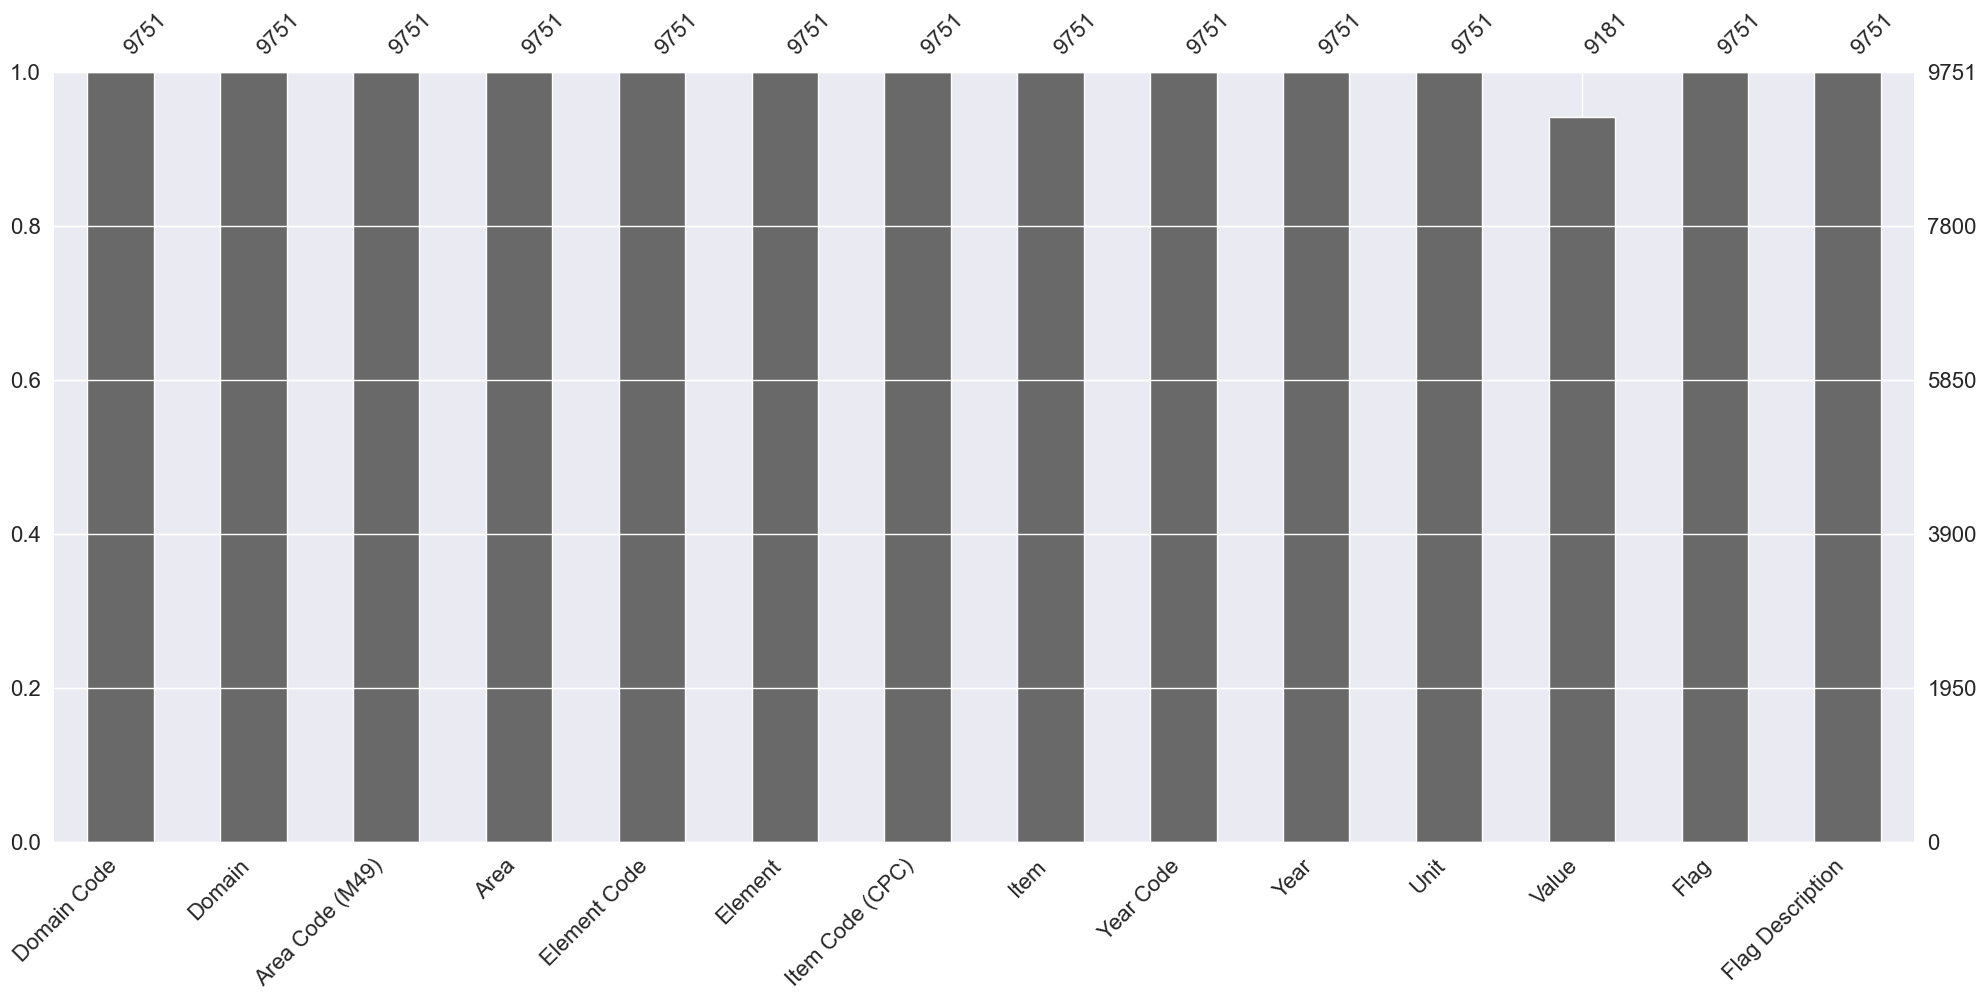

In [6]:
msno.bar(df_ireland)
# In this example we see that the column "Value" has a missing values. 
# The remaining columns are full and have a maximum number of values.

## Matrix Plot
The matrix plot is a great tool if you are working with depth-related data or time-series data. It provides a colour fill for each column. When data is present, the plot is shaded in grey (or your colour of choice), and when it is absent the plot is displayed in white.

<AxesSubplot:>

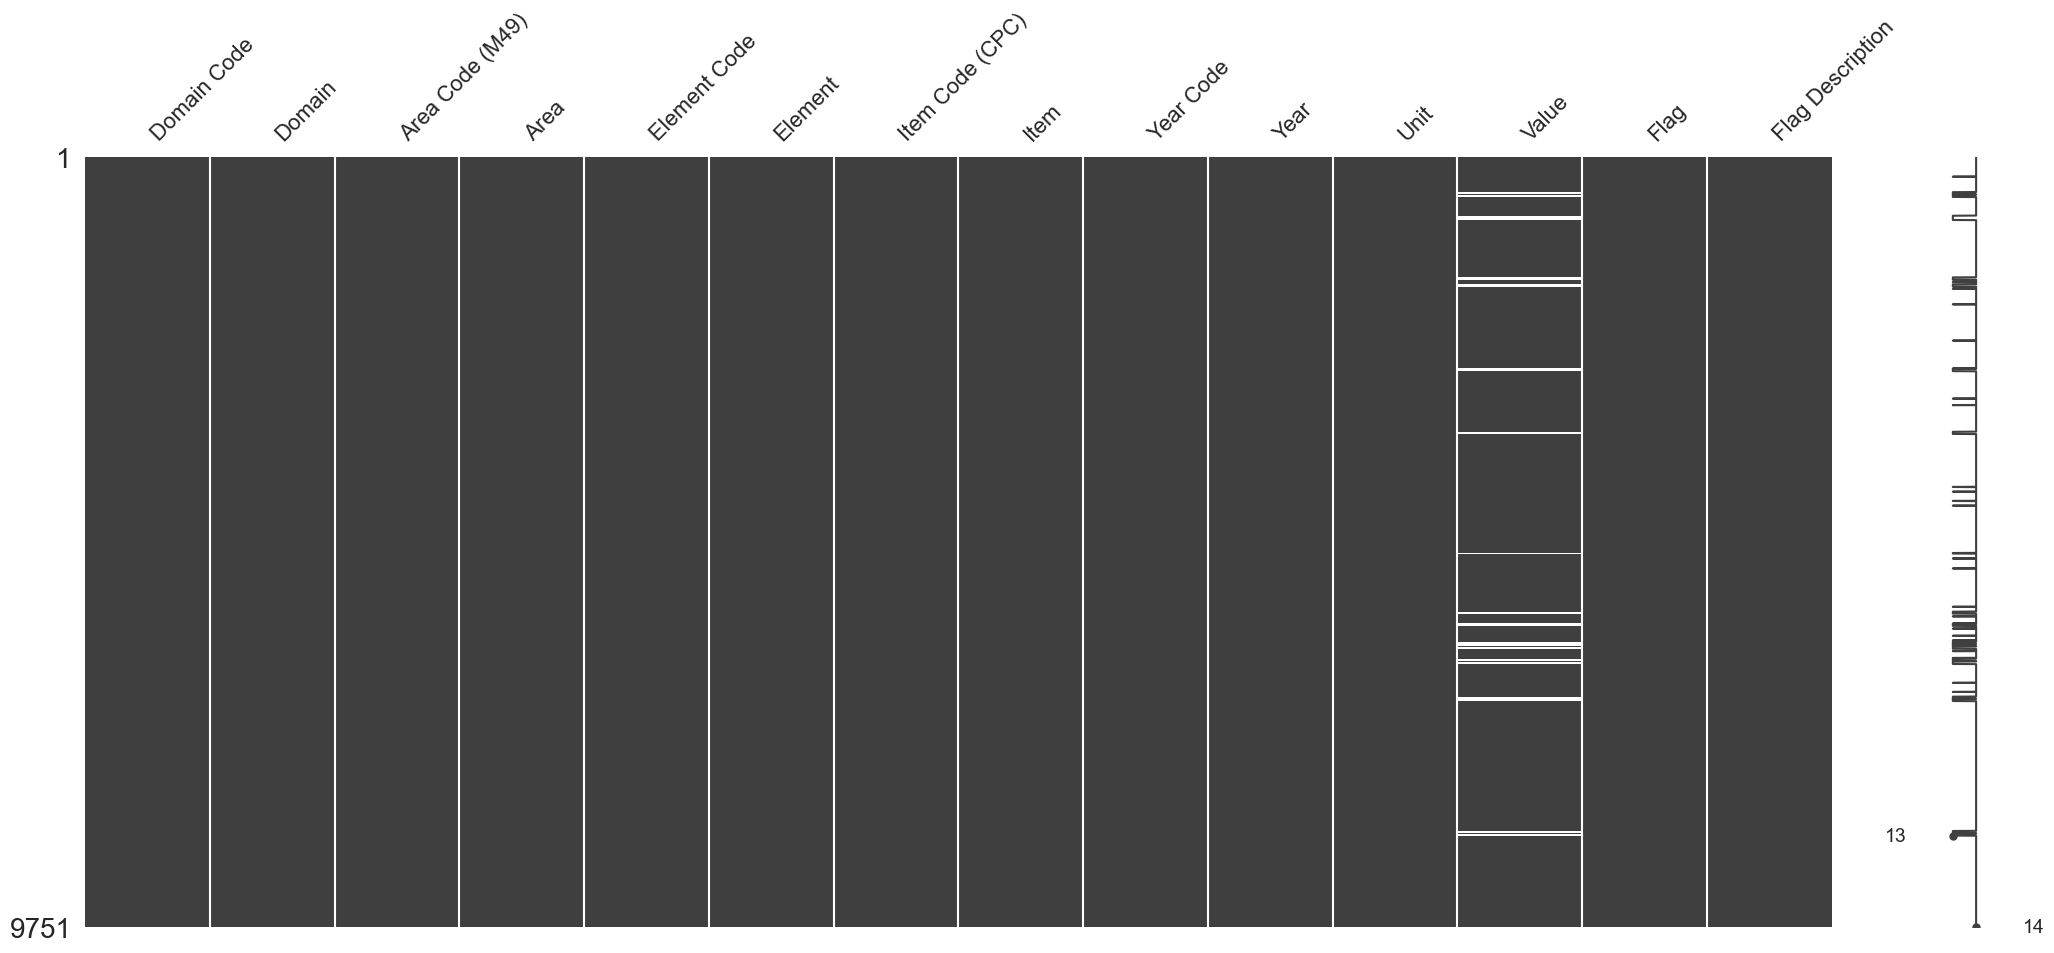

In [7]:
msno.matrix(df_ireland) 

### Dendrogram
The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

If a number of columns are grouped together at level zero, then the presence of nulls in one of those columns is directly related to the presence or absence of nulls in the others columns. The more separated the columns in the tree, the less likely the null values can be correlated between the columns.

<AxesSubplot:>

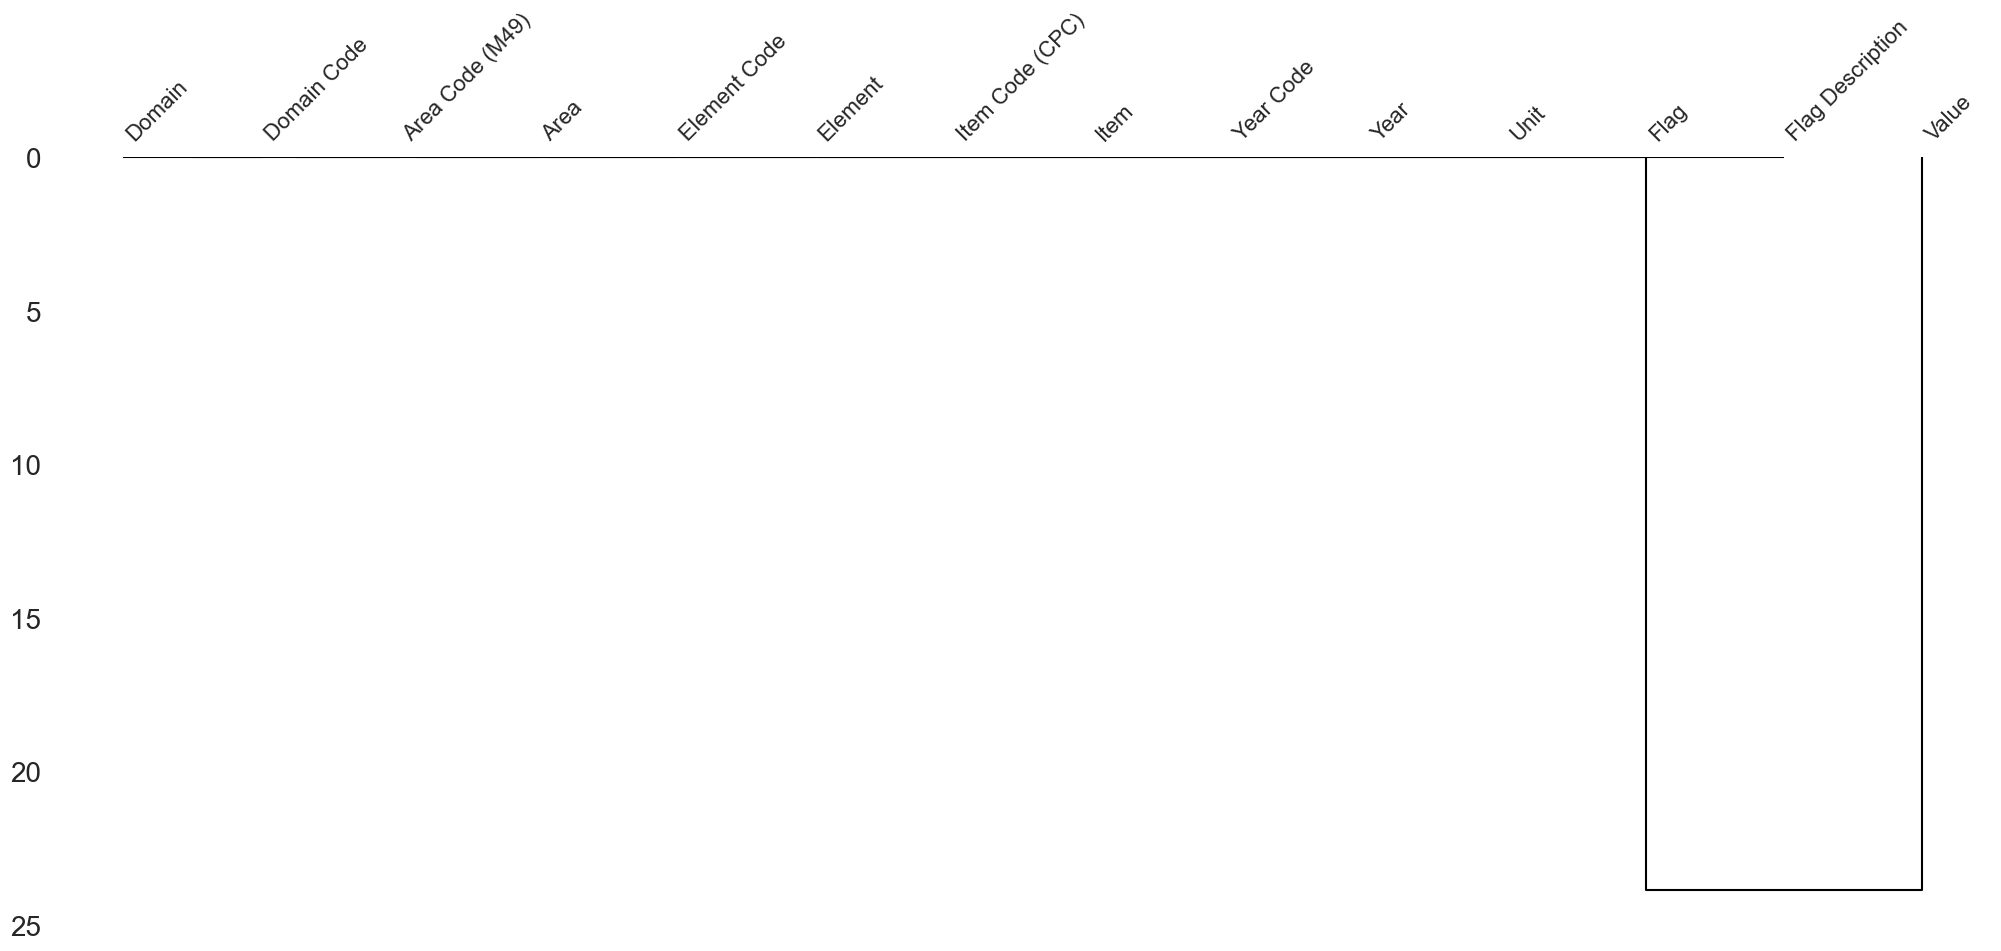

In [8]:
msno.dendrogram(df_ireland)

# All columns except 'Flag' and 'Value' are all grouped together at zero indicating that they are complete.

In [9]:
# To remove missing rows, we can call upon the following

df_ireland_drop = df_ireland.dropna()

#df_ireland_drop.to_csv('df_ireland_drop.csv')

In [10]:
df_ireland = df_ireland_drop

In [11]:
df_ireland.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [12]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9181 entries, 0 to 9750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       9181 non-null   object 
 1   Domain            9181 non-null   object 
 2   Area Code (M49)   9181 non-null   int64  
 3   Area              9181 non-null   object 
 4   Element Code      9181 non-null   int64  
 5   Element           9181 non-null   object 
 6   Item Code (CPC)   9181 non-null   object 
 7   Item              9181 non-null   object 
 8   Year Code         9181 non-null   int64  
 9   Year              9181 non-null   int64  
 10  Unit              9181 non-null   object 
 11  Value             9181 non-null   float64
 12  Flag              9181 non-null   object 
 13  Flag Description  9181 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ MB


In [13]:
df_ireland['Flag Description'].value_counts()

# After deleting missing values, the Missing value column and some values from the Official figure were deleted

Official figure      4020
Estimated value      3157
Imputed value        1520
Unofficial figure     484
Name: Flag Description, dtype: int64

In [14]:
# convert float64 in "Value" col to int.
df_ireland['Value'] = df_ireland['Value'].astype(int) 

In [15]:
# Rows containing duplicate data 
duplicate_rows_df_ireland = df_ireland[df_ireland.duplicated()]
print("number of duplicate rows:", duplicate_rows_df_ireland.shape)

number of duplicate rows: (0, 14)


## Anomaly Detection  - выбросы

### Building the Isolation Forest Model with Scikit-Learn
From our data frame, we need to select the variables with which we will train our isolated forest model.

In this example, I will only use two variables ('Year', 'Value'). 
Using two variables allows us to visualize what the algorithm did.

In [16]:
from sklearn.ensemble import IsolationForest


In [17]:
# First, we will create a list of our column names:

anomaly_inputs = ['Year', 'Value']

In [18]:
# Next, we will create an instance of our Isolation Forest model. 
# This is done, first by creating a variable called model_IF and then assigning it to IsolationForest().

# We can then pass in a number of parameters for our model. 

model_IF = IsolationForest(contamination=float(0.2),random_state=42)


In [19]:
model_IF.fit(df_ireland[anomaly_inputs])


IsolationForest(contamination=0.2, random_state=42)

After fitting the model, we can now create some predictions. We will do this by adding two new columns to our dataframe:

anomaly_scores : Generated by calling upon model_IF.decision_function() and provides the anomaly score for each sample within the dataset. The lower the score, the more abnormal that sample is. Negative values indicate that the sample is an outlier.

anomaly : Generated by calling upon model_IF.predict() and is used to identify if a point is an outlier (-1) or an inlier (1)

In [20]:
df_ireland['anomaly_scores'] = model_IF.decision_function(df_ireland[anomaly_inputs])
df_ireland['anomaly'] = model_IF.predict(df_ireland[anomaly_inputs])

In [21]:
# Once the anomalies have been identified, we can view our dataframe and see the result.
df_ireland.loc[:, ['Year', 'Value','anomaly_scores','anomaly'] ]

,Year,Value,anomaly_scores,anomaly
0,2018,0,0.059903,1
1,2019,0,0.048112,1
2,2020,0,0.029219,1
3,2018,0,0.059903,1
4,2019,0,0.048112,1
...,...,...,...,...
9746,2013,0,0.083969,1
9747,2014,0,0.084255,1
9748,2015,0,0.081909,1
9749,2016,0,0.071388,1


## Visualising Anomaly Data using matplotlib

In [22]:
def outlier_plot(data, outlier_method_name, x_var, y_var, 
                 xaxis_limits=[0,1], yaxis_limits=[0,1]):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    # Create a dynamic title based on the method
    method = f'{outlier_method_name}_anomaly'
    
    # Print out key statistics
    print(f"Number of anomalous values {len(data[data['anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')
    
    # Create the chart using seaborn
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Outlier Method: {outlier_method_name}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim=yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly']== -1])} points")
    axes[1].set_title(f"Inliers\n {len(data[data['anomaly']==  1])} points")
    return g

Outlier Method: Isolation Forest
Number of anomalous values 1836
Number of non anomalous values  7345
Total Number of Values: 9181


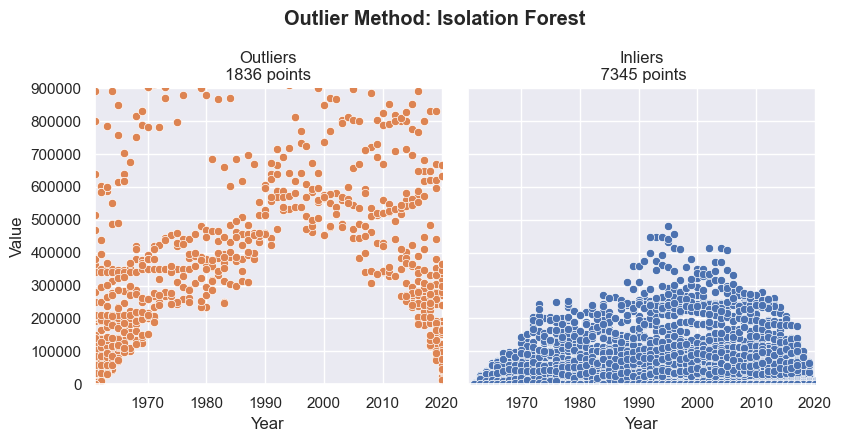

In [23]:
# Right away we can tell how many values have been identified as outliers and where they are located.


outlier_plot(df_ireland, 'Isolation Forest', 'Year', 'Value', [1961, 2020], [0, 900000]);

## Visualising Outliers with Seaborn’s Pairplot

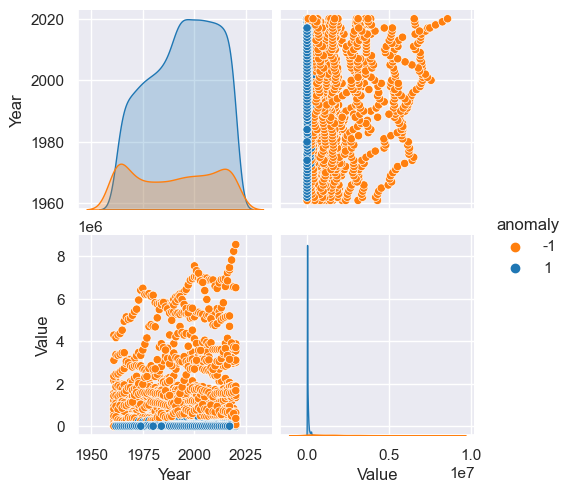

In [24]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df_ireland, vars=anomaly_inputs, hue='anomaly', palette=palette)

array([[<AxesSubplot:title={'center':'Area Code (M49)'}>,
        <AxesSubplot:title={'center':'Element Code'}>,
        <AxesSubplot:title={'center':'Year Code'}>],
       [<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Value'}>,
        <AxesSubplot:title={'center':'anomaly_scores'}>],
       [<AxesSubplot:title={'center':'anomaly'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

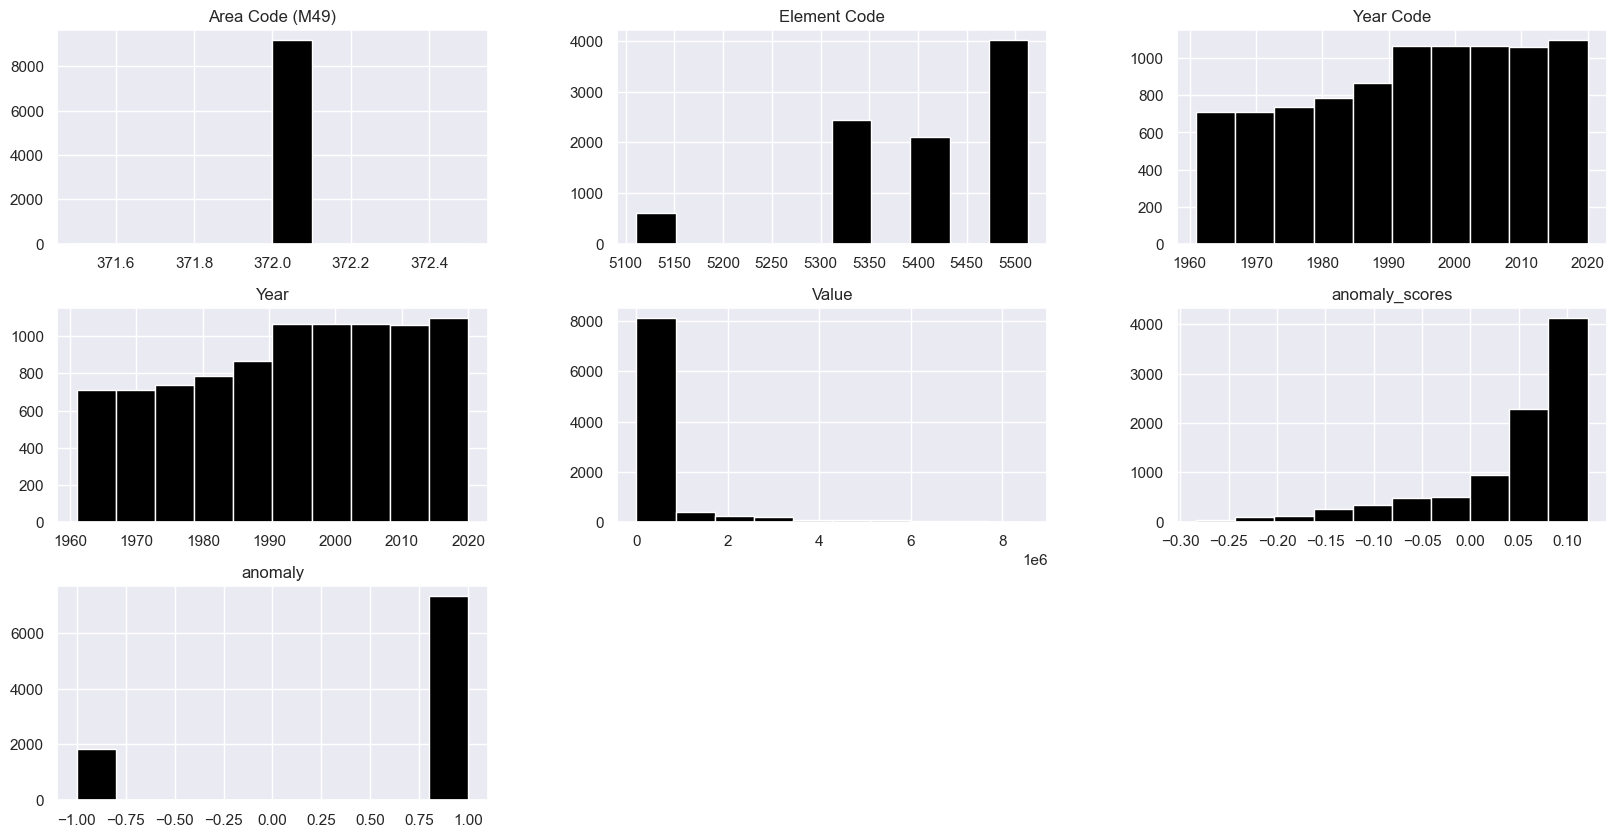

In [25]:
df_ireland.hist(bins = 10, figsize = (20,10), color = 'black')

<AxesSubplot:xlabel='Value'>

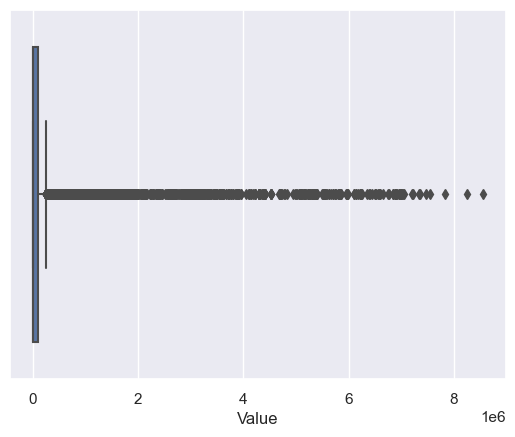

In [26]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

### Inter Quartile Range

Inter Quartile Range (IQR) is one of the most extensively used procedure for outlier detection and removal. According to this procedure, we need to follow the following steps:

Find the first quartile, Q1.
Find the third quartile, Q3.
Calculate the IQR. IQR = Q3-Q1.
Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR.
Any data point outside this range is considered as outlier and should be removed for further analysis.
In boxplot, this IQR method is implemented to detect any extreme data point where the maximum point (the end of high whisker) is Q3+1.5*IQR and the minimum point (the start of low whisker) is Q1–1.5*IQR.

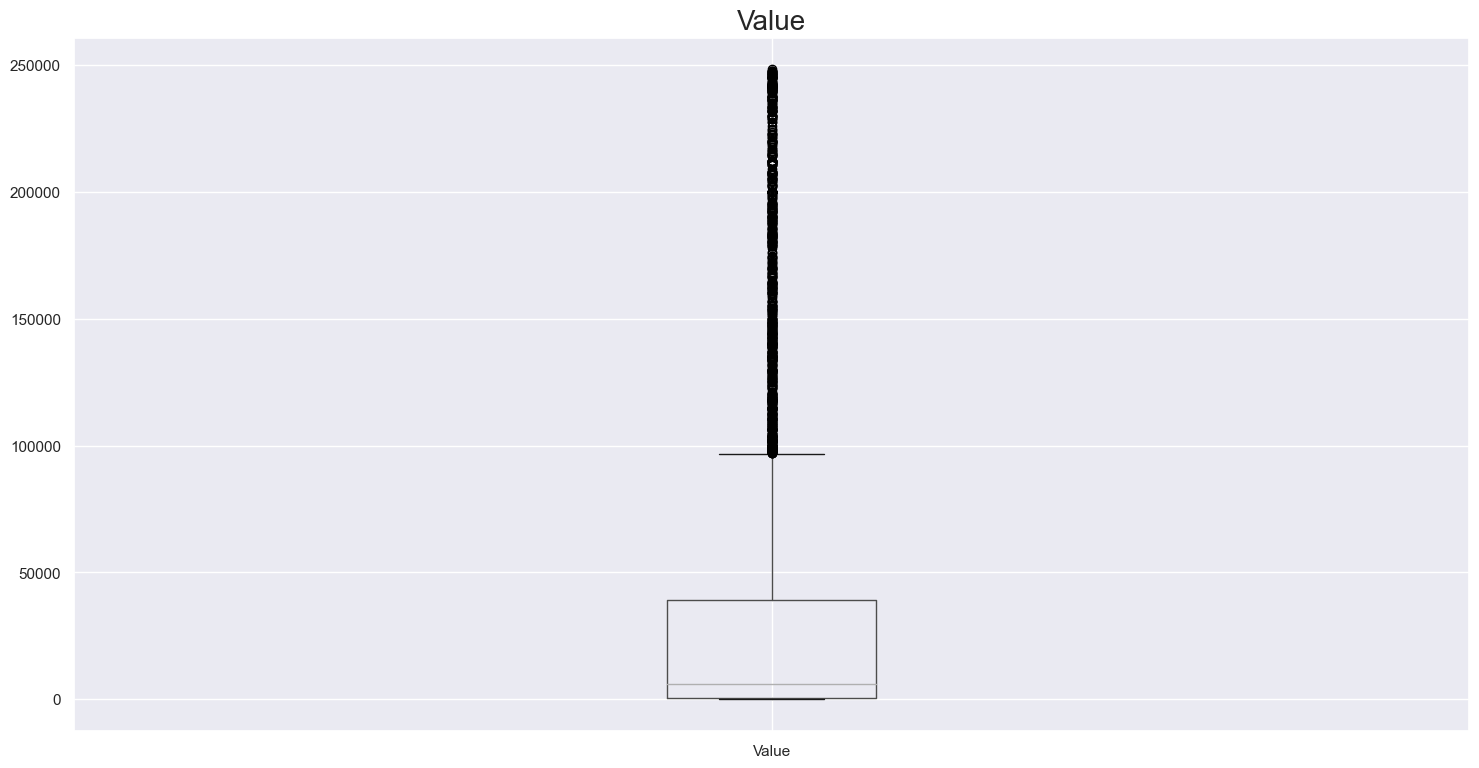

In [27]:
Q1 = df_ireland["Value"].quantile(0.25) 
Q3 = df_ireland["Value"].quantile(0.75) 
IQR = Q3 - Q1 
df_ireland = df_ireland[((df_ireland["Value"] >= (Q1 - 1.5 * IQR)) & (df_ireland["Value"] <= (Q3 +1.5 * IQR)))] 
num_cols = ['Value'] 
plt.figure(figsize=(18,9)) 
df_ireland[num_cols].boxplot() 
plt.title("Value", fontsize=20) 
plt.show()

<AxesSubplot:xlabel='Value'>

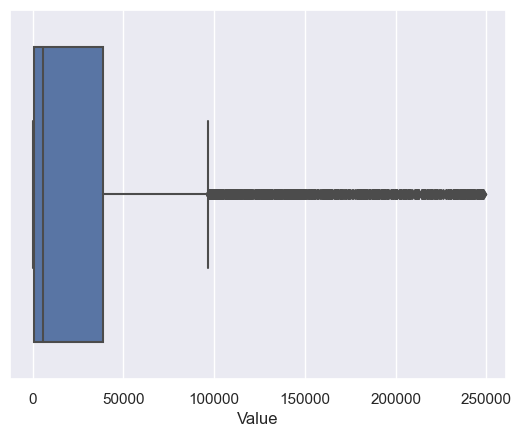

In [28]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

##  Outliers based on z-score


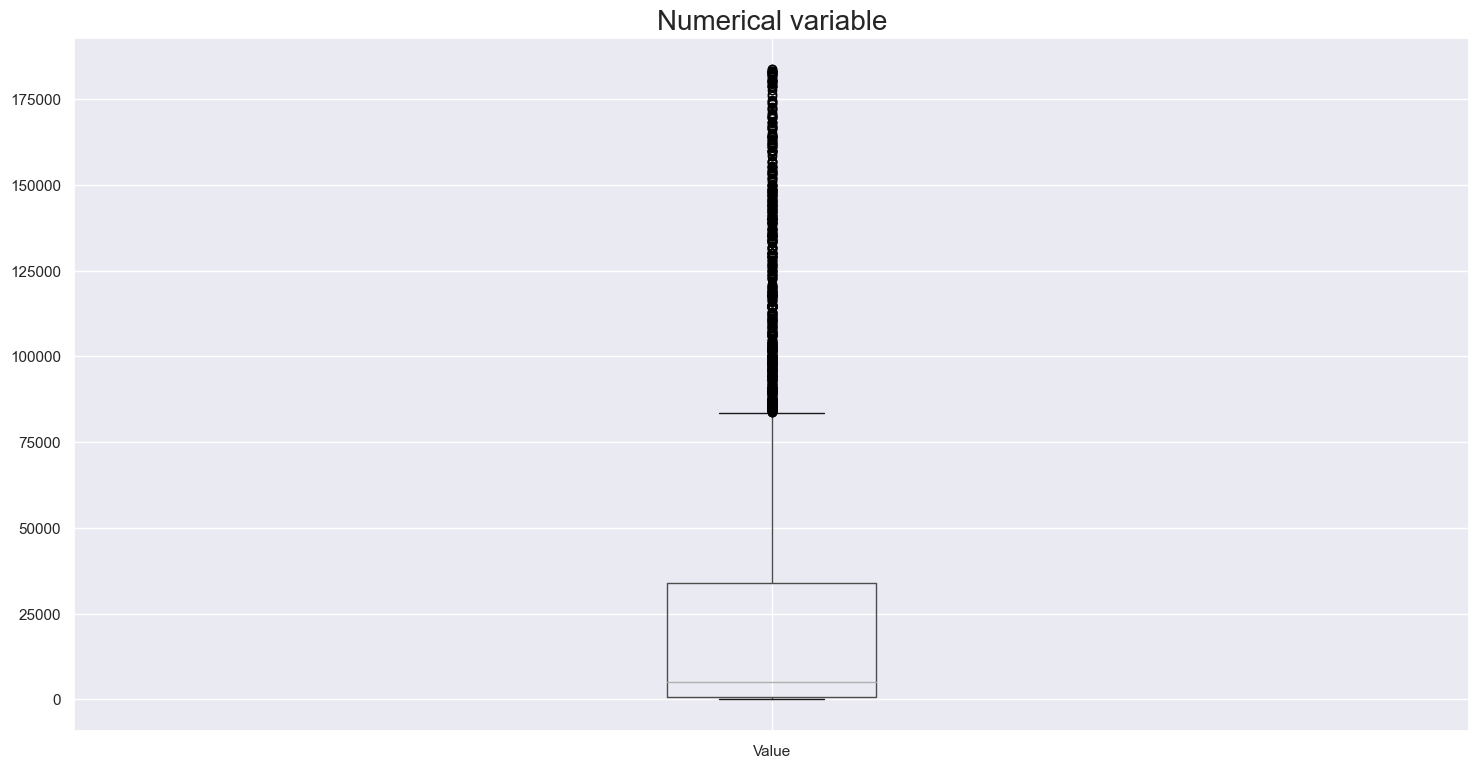

In [29]:
df_zscore = df_ireland["Value"]
z = np.abs(stats.zscore(df_zscore)) 
df_zscore = pd.concat([df_zscore, z], axis=1) 
df_zscore.columns = ['Value', 'z_score'] 
df_zscore = df_zscore[(df_zscore.z_score < 3) & (df_zscore.z_score > -3)] 
num_cols = ['Value'] 
plt.figure(figsize=(18,9)) 
df_zscore[num_cols].boxplot() 
plt.title("Numerical variable", fontsize=20) 
plt.show()

In [30]:
#df_ireland.loc[df_ireland["Value"]> 7000, 'Value'] = df_ireland["Value"].median()
#df_ireland["Value"].hist()

<AxesSubplot:xlabel='Value'>

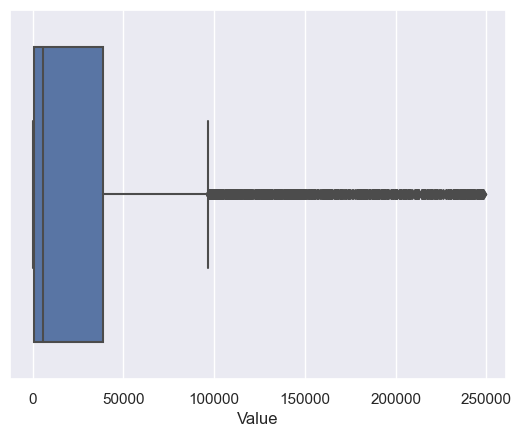

In [31]:
sns.boxplot(x=df_ireland["Value"], whis=1.5)  

In [32]:
df_ireland = df_ireland.drop(columns = ['anomaly_scores','anomaly'])

In [33]:
df_ireland.describe()


,Area Code (M49),Element Code,Year Code,Year,Value
count,7581.0,7581.000000,7581.000000,7581.000000,7581.000000
mean,372.0,5417.588181,1993.266456,1993.266456,30462.172141
std,0.0,109.690842,16.929396,16.929396,51086.824386
min,372.0,5111.000000,1961.000000,1961.000000,0.000000
25%,372.0,5312.000000,1979.000000,1979.000000,600.000000
50%,372.0,5420.000000,1995.000000,1995.000000,6000.000000
75%,372.0,5510.000000,2008.000000,2008.000000,39058.000000
max,372.0,5510.000000,2020.000000,2020.000000,248366.000000


# EDA for df_ukraine

Let's do a similar research for the dataset collected for Ukraine:

In [34]:
df_ukraine = pd.read_csv('data_ukraine.csv')
df_ukraine.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1992,1992,ha,3500.0,E,Estimated value
1,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1993,1993,ha,3760.0,I,Imputed value
2,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1994,1994,ha,3825.0,I,Imputed value
3,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1995,1995,ha,3000.0,E,Estimated value
4,QCL,Crops and livestock products,804,Ukraine,5312,Area harvested,01371,"Almonds, in shell",1996,1996,ha,5000.0,T,Unofficial figure


In [35]:
df_ukraine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10291 entries, 0 to 10290
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       10291 non-null  object 
 1   Domain            10291 non-null  object 
 2   Area Code (M49)   10291 non-null  int64  
 3   Area              10291 non-null  object 
 4   Element Code      10291 non-null  int64  
 5   Element           10291 non-null  object 
 6   Item Code (CPC)   10291 non-null  object 
 7   Item              10291 non-null  object 
 8   Year Code         10291 non-null  int64  
 9   Year              10291 non-null  int64  
 10  Unit              10291 non-null  object 
 11  Value             9661 non-null   float64
 12  Flag              10291 non-null  object 
 13  Flag Description  10291 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 1.1+ MB


<AxesSubplot:>

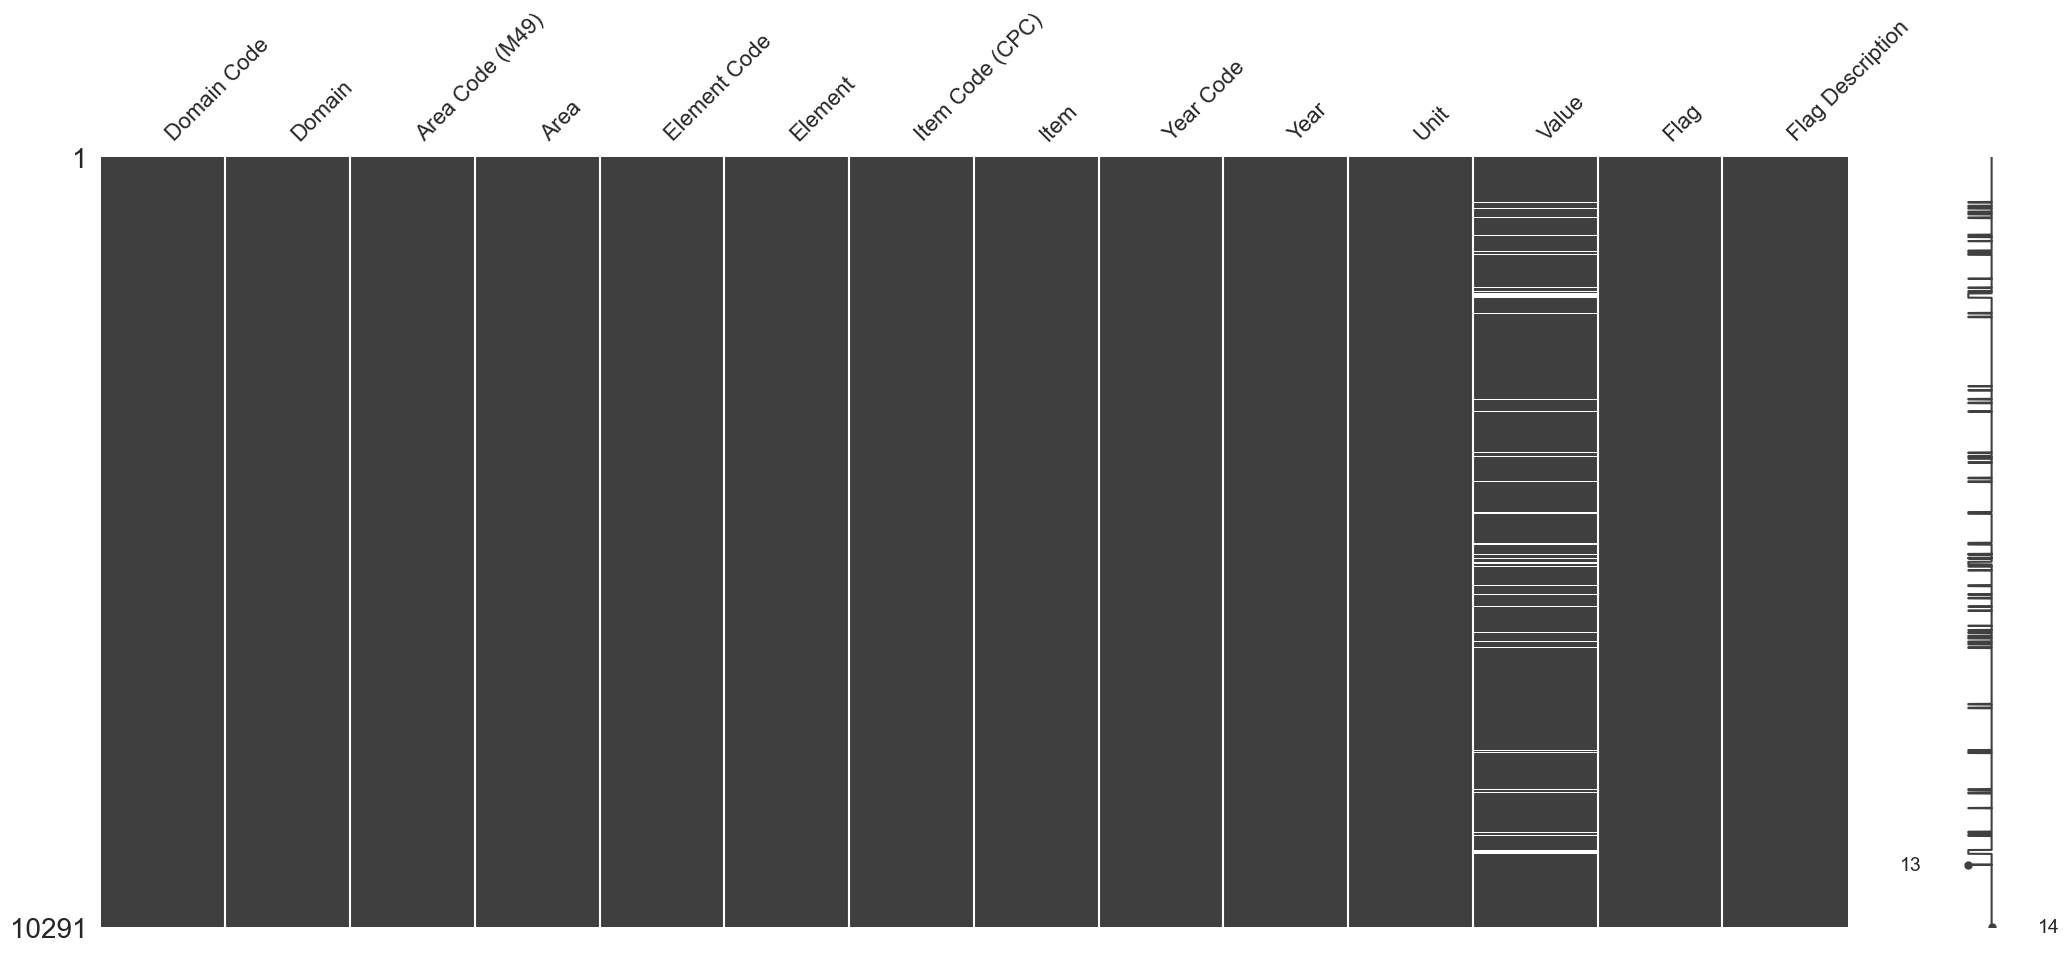

In [36]:
msno.matrix(df_ukraine) 

In [37]:
df_ukraine.isnull().sum()

Domain Code           0
Domain                0
Area Code (M49)       0
Area                  0
Element Code          0
Element               0
Item Code (CPC)       0
Item                  0
Year Code             0
Year                  0
Unit                  0
Value               630
Flag                  0
Flag Description      0
dtype: int64

In [38]:
df_ukraine = df_ukraine.dropna()
df_ukraine.isnull().sum()

Domain Code         0
Domain              0
Area Code (M49)     0
Area                0
Element Code        0
Element             0
Item Code (CPC)     0
Item                0
Year Code           0
Year                0
Unit                0
Value               0
Flag                0
Flag Description    0
dtype: int64

In [39]:
# Rows containing duplicate data 
duplicate_rows_df_ukraine = df_ukraine[df_ukraine.duplicated()]
print("number of duplicate rows:", duplicate_rows_df_ukraine.shape)

number of duplicate rows: (0, 14)


In [40]:
df_ukraine.describe(include = "all")

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
count,9661,9661,9661.0,9661,9661.000000,9661,9661,9661,9661.000000,9661.000000,9661,9.661000e+03,9661,9661
unique,1,1,NaN,1,NaN,8,155,155,NaN,NaN,11,NaN,4,4
top,QCL,Crops and livestock products,NaN,Ukraine,NaN,Production,0231,"Hen eggs in shell, fresh",NaN,NaN,tonnes,NaN,A,Official figure
freq,9661,9661,NaN,9661,NaN,3771,145,145,NaN,NaN,3713,NaN,5100,5100
mean,NaN,NaN,804.0,NaN,5411.326260,NaN,NaN,NaN,2006.547459,2006.547459,NaN,7.324167e+05,NaN,NaN
std,NaN,NaN,0.0,NaN,100.370632,NaN,NaN,NaN,8.220420,8.220420,NaN,2.715715e+06,NaN,NaN
min,NaN,NaN,804.0,NaN,5111.000000,NaN,NaN,NaN,1992.000000,1992.000000,NaN,0.000000e+00,NaN,NaN
25%,NaN,NaN,804.0,NaN,5312.000000,NaN,NaN,NaN,2000.000000,2000.000000,NaN,5.000000e+03,NaN,NaN
50%,NaN,NaN,804.0,NaN,5419.000000,NaN,NaN,NaN,2007.000000,2007.000000,NaN,2.568200e+04,NaN,NaN
75%,NaN,NaN,804.0,NaN,5510.000000,NaN,NaN,NaN,2014.000000,2014.000000,NaN,1.530910e+05,NaN,NaN


array([[<AxesSubplot:title={'center':'Area Code (M49)'}>,
        <AxesSubplot:title={'center':'Element Code'}>],
       [<AxesSubplot:title={'center':'Year Code'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Value'}>, <AxesSubplot:>]],
      dtype=object)

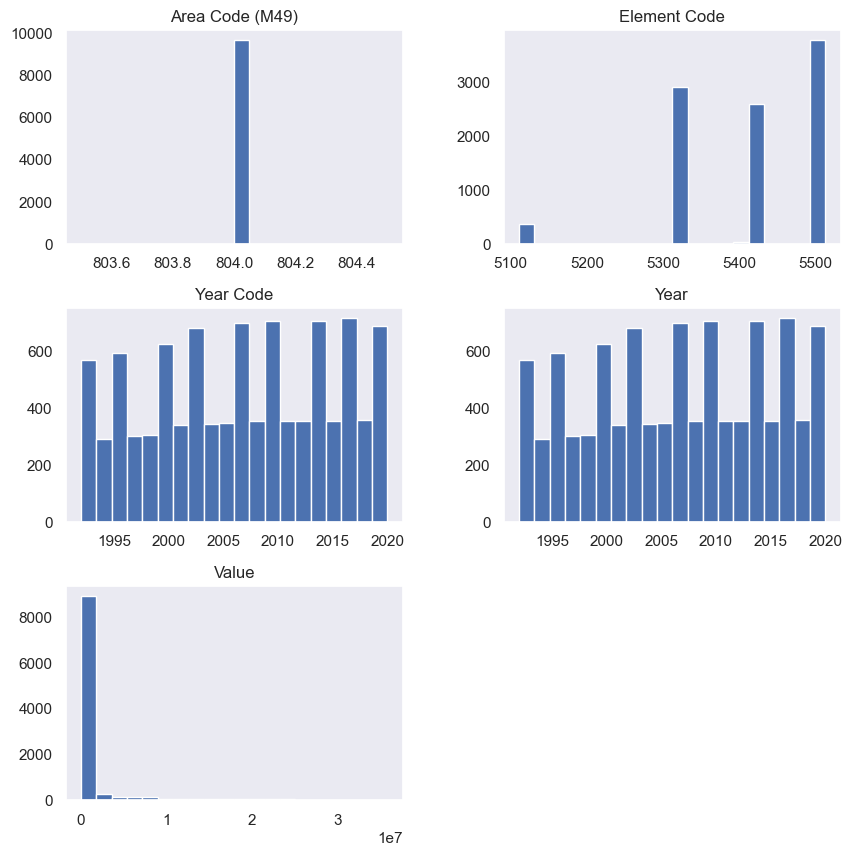

In [41]:
df_ukraine.hist(figsize=(10,10), bins=20, grid=False)

<AxesSubplot:xlabel='Value'>

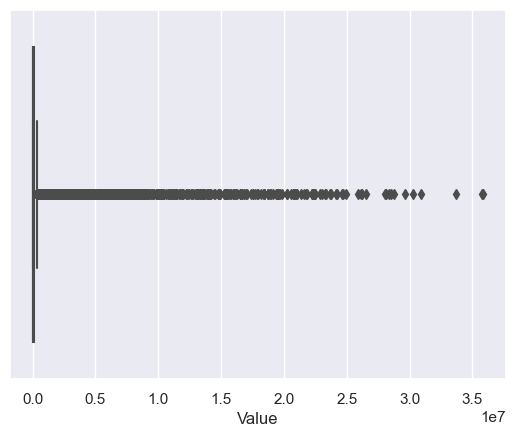

In [42]:
sns.boxplot(x=df_ukraine["Value"], whis=1.5)  

In [43]:
df_ukraine['Value'].value_counts()

100.0      92
500.0      71
5000.0     64
10000.0    60
1000.0     55
           ..
1804.0      1
1601.0      1
1653.0      1
1755.0      1
80650.0     1
Name: Value, Length: 6331, dtype: int64

In [44]:
Q1 = df_ukraine.quantile(0.25)
Q3 = df_ukraine.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Area Code (M49)         0.0
Element Code          198.0
Year Code              14.0
Year                   14.0
Value              148091.0
dtype: float64


In [45]:
df_ukraine.shape

(9661, 14)

In [46]:
df_ukraine = df_ukraine[~((df_ukraine < (Q1-1.5 * IQR)) |(df_ukraine > (Q3 + 1.5 * IQR))).any(axis=1)]
df_ukraine.shape

(7918, 14)

In [47]:
df_ukraine['Value'].value_counts()

100.0       92
500.0       71
5000.0      64
10000.0     60
1000.0      55
            ..
106803.0     1
99307.0      1
94061.0      1
97204.0      1
80650.0      1
Name: Value, Length: 4918, dtype: int64

<AxesSubplot:xlabel='Value'>

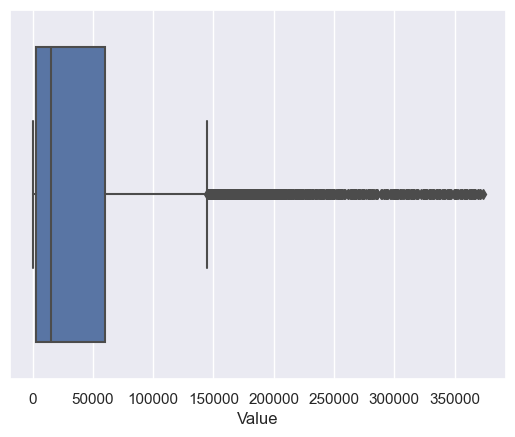

In [48]:
sns.boxplot(x=df_ukraine["Value"], whis=1.5)  

<AxesSubplot:>

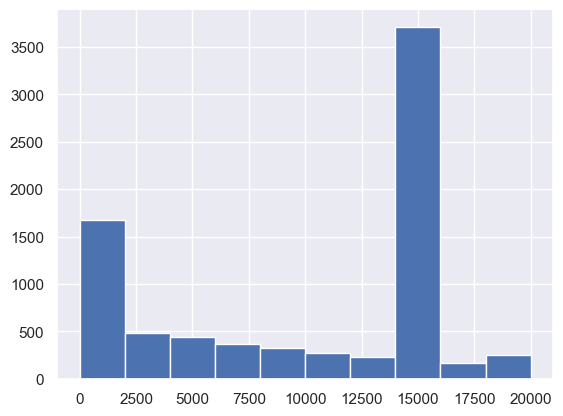

In [49]:
df_ukraine.loc[df_ukraine["Value"]> 20000, 'Value'] = df_ukraine["Value"].median()
df_ukraine["Value"].hist()

<AxesSubplot:xlabel='Value'>

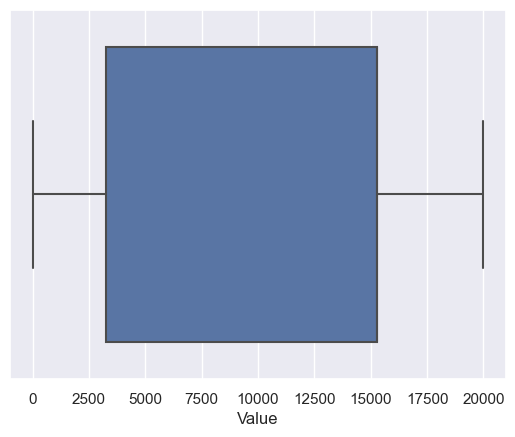

In [50]:
sns.boxplot(x=df_ukraine["Value"], whis=1.5)  

In [51]:
df_ukraine.shape

(7918, 14)

In [52]:
df_ukraine['Element'].value_counts()

Production                       2926
Yield                            2367
Area harvested                   1879
Yield/Carcass Weight              242
Stocks                            228
Producing Animals/Slaughtered     213
Milk Animals                       34
Laying                             29
Name: Element, dtype: int64

### Обьединение колонок с помощью merge

In [53]:
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')
import warnings
warnings.filterwarnings('ignore')
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

In [54]:
df_ireland.shape

(7581, 14)

In [55]:
df_ukraine.shape

(7918, 14)

### Обьединение двух таблиц

In [56]:
outer_merge=pd.merge(df_ireland, df_ukraine, how="outer")

In [57]:
outer_merge.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0.0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0.0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0.0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0.0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0.0,A,Official figure


In [58]:
df = outer_merge

In [59]:
df.shape

(15499, 14)

In [60]:
df['Element Code'].value_counts()

5510    6431
5312    3378
5419    3115
5417     382
5112     373
5420     366
5321     365
5424     331
5111     259
5320     178
5410      86
5313      86
5413      56
5318      37
5114      29
5513      27
Name: Element Code, dtype: int64

In [61]:
df['Element'].value_counts()

Production                       6458
Yield                            3623
Area harvested                   3378
Yield/Carcass Weight              713
Stocks                            661
Producing Animals/Slaughtered     543
Laying                             86
Milk Animals                       37
Name: Element, dtype: int64

In [62]:
df['Item Code (CPC)'].value_counts()

0231        285
01213       267
01242       258
21122       258
21118.01    258
           ... 
2167          5
21631.02      5
02212         3
02112         3
0143          2
Name: Item Code (CPC), Length: 171, dtype: int64

In [63]:
df['Item'].value_counts()

Hen eggs in shell, fresh           285
Cauliflowers and broccoli          267
Peas, green                        258
Meat of ducks, fresh or chilled    258
Horse meat, fresh or chilled       258
                                  ... 
Olive oil                            5
Safflower-seed oil, crude            5
Raw milk of buffalo                  3
Buffalo                              3
Cotton seed                          2
Name: Item, Length: 171, dtype: int64

In [64]:
df['Year'].value_counts()

2019    458
2018    451
2017    445
2016    441
2015    438
2012    437
2013    435
2007    435
2014    434
2011    434
2010    434
2009    433
2008    433
2003    432
2006    431
2002    430
2020    428
2004    427
2005    427
2001    425
2000    406
1998    397
1999    396
1997    386
1996    383
1995    381
1994    378
1992    374
1993    370
1991    146
1990    130
1988    125
1989    124
1986    117
1987    116
1985    115
1984    111
1983    111
1982    110
1979    109
1981    108
1980    106
1978    106
1975    103
1974    103
1976    102
1977    101
1965    101
1970     99
1969     99
1964     99
1966     99
1963     98
1972     98
1971     98
1967     98
1962     97
1968     97
1973     97
1961     97
Name: Year, dtype: int64

In [65]:
df['Unit'].value_counts()

tonnes       6431
ha           3378
hg/ha        3115
1000 Head     824
hg/An         748
Head          474
0.1g/An       331
100mg/An       86
No/An          56
No             29
1000 No        27
Name: Unit, dtype: int64

In [66]:
df['Flag'].value_counts()

A    6347
E    5776
I    2435
T     941
Name: Flag, dtype: int64

In [67]:
df['Flag Description'].value_counts()

Official figure      6347
Estimated value      5776
Imputed value        2435
Unofficial figure     941
Name: Flag Description, dtype: int64

In [68]:
#df = df.query("Flag Description=='Unofficial figure'")

In [69]:
df=df.drop(columns=['Domain Code','Domain', 'Year Code','Element Code', 'Item Code (CPC)', 'Flag'])
df.head(10)

,Area Code (M49),Area,Element,Item,Year,Unit,Value,Flag Description
0,372,Ireland,Area harvested,"Almonds, in shell",2018,ha,0.0,Official figure
1,372,Ireland,Area harvested,"Almonds, in shell",2019,ha,0.0,Official figure
2,372,Ireland,Area harvested,"Almonds, in shell",2020,ha,0.0,Official figure
3,372,Ireland,Production,"Almonds, in shell",2018,tonnes,0.0,Official figure
4,372,Ireland,Production,"Almonds, in shell",2019,tonnes,0.0,Official figure
5,372,Ireland,Production,"Almonds, in shell",2020,tonnes,0.0,Official figure
6,372,Ireland,Area harvested,Apples,1961,ha,3000.0,Estimated value
7,372,Ireland,Area harvested,Apples,1962,ha,3000.0,Estimated value
8,372,Ireland,Area harvested,Apples,1963,ha,3000.0,Estimated value
9,372,Ireland,Area harvested,Apples,1964,ha,2000.0,Estimated value


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15499 entries, 0 to 15498
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area Code (M49)   15499 non-null  int64  
 1   Area              15499 non-null  object 
 2   Element           15499 non-null  object 
 3   Item              15499 non-null  object 
 4   Year              15499 non-null  int64  
 5   Unit              15499 non-null  object 
 6   Value             15499 non-null  float64
 7   Flag Description  15499 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.1+ MB


In [71]:
df1 = df.query("Element=='Production'")
df1.head(20)

,Area Code (M49),Area,Element,Item,Year,Unit,Value,Flag Description
3,372,Ireland,Production,"Almonds, in shell",2018,tonnes,0.0,Official figure
4,372,Ireland,Production,"Almonds, in shell",2019,tonnes,0.0,Official figure
5,372,Ireland,Production,"Almonds, in shell",2020,tonnes,0.0,Official figure
113,372,Ireland,Production,Apples,1961,tonnes,29000.0,Official figure
114,372,Ireland,Production,Apples,1962,tonnes,31000.0,Official figure
115,372,Ireland,Production,Apples,1963,tonnes,35000.0,Official figure
116,372,Ireland,Production,Apples,1964,tonnes,24000.0,Official figure
117,372,Ireland,Production,Apples,1965,tonnes,21000.0,Official figure
118,372,Ireland,Production,Apples,1966,tonnes,17000.0,Official figure
119,372,Ireland,Production,Apples,1967,tonnes,16000.0,Official figure


In [72]:
df1['Item'].value_counts()

Strawberries                       89
Meat of sheep, fresh or chilled    89
Cauliflowers and broccoli          89
Pig fat, rendered                  87
Margarine and shortening           87
                                   ..
Oranges                             3
Triticale                           3
Cotton seed                         2
Sunflower seed                      2
Potatoes                            1
Name: Item, Length: 157, dtype: int64

## Strawberries

In [73]:
df1 = df.query("Item=='Strawberries'")
df1.head(20)

,Area Code (M49),Area,Element,Item,Year,Unit,Value,Flag Description
6715,372,Ireland,Area harvested,Strawberries,1961,ha,500.0,Estimated value
6716,372,Ireland,Area harvested,Strawberries,1962,ha,500.0,Estimated value
6717,372,Ireland,Area harvested,Strawberries,1963,ha,500.0,Estimated value
6718,372,Ireland,Area harvested,Strawberries,1964,ha,500.0,Estimated value
6719,372,Ireland,Area harvested,Strawberries,1965,ha,500.0,Estimated value
6720,372,Ireland,Area harvested,Strawberries,1966,ha,500.0,Estimated value
6721,372,Ireland,Area harvested,Strawberries,1967,ha,500.0,Estimated value
6722,372,Ireland,Area harvested,Strawberries,1968,ha,500.0,Estimated value
6723,372,Ireland,Area harvested,Strawberries,1969,ha,500.0,Estimated value
6724,372,Ireland,Area harvested,Strawberries,1970,ha,500.0,Estimated value


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 6715 to 14712
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area Code (M49)   256 non-null    int64  
 1   Area              256 non-null    object 
 2   Element           256 non-null    object 
 3   Item              256 non-null    object 
 4   Year              256 non-null    int64  
 5   Unit              256 non-null    object 
 6   Value             256 non-null    float64
 7   Flag Description  256 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 18.0+ KB


In [75]:
df1['Area'].value_counts()

Ireland    169
Ukraine     87
Name: Area, dtype: int64

In [76]:
df1['Flag Description'].value_counts()

Official figure      130
Estimated value      119
Imputed value          4
Unofficial figure      3
Name: Flag Description, dtype: int64

In [77]:
df1 = df1.rename(columns ={"Area":"Country","Area Code (M49)":"Numeric"})
df1.head(5)

,Numeric,Country,Element,Item,Year,Unit,Value,Flag Description
6715,372,Ireland,Area harvested,Strawberries,1961,ha,500.0,Estimated value
6716,372,Ireland,Area harvested,Strawberries,1962,ha,500.0,Estimated value
6717,372,Ireland,Area harvested,Strawberries,1963,ha,500.0,Estimated value
6718,372,Ireland,Area harvested,Strawberries,1964,ha,500.0,Estimated value
6719,372,Ireland,Area harvested,Strawberries,1965,ha,500.0,Estimated value


In [80]:
country_codes = pd.read_table('country_codes.tsv')
country_codes.head()


,Country,Alpha-2 code,Alpha-3 code,Numeric
0,Afghanistan,AF,AFG,4
1,Albania,AL,ALB,8
2,Algeria,DZ,DZA,12
3,American Samoa,AS,ASM,16
4,Andorra,AD,AND,20


In [81]:
df2=pd.merge(df1, country_codes, how="outer")
df2.head(10)

,Numeric,Country,Element,Item,Year,Unit,Value,Flag Description,Alpha-2 code,Alpha-3 code
0,372,Ireland,Area harvested,Strawberries,1961.0,ha,500.0,Estimated value,IE,IRL
1,372,Ireland,Area harvested,Strawberries,1962.0,ha,500.0,Estimated value,IE,IRL
2,372,Ireland,Area harvested,Strawberries,1963.0,ha,500.0,Estimated value,IE,IRL
3,372,Ireland,Area harvested,Strawberries,1964.0,ha,500.0,Estimated value,IE,IRL
4,372,Ireland,Area harvested,Strawberries,1965.0,ha,500.0,Estimated value,IE,IRL
5,372,Ireland,Area harvested,Strawberries,1966.0,ha,500.0,Estimated value,IE,IRL
6,372,Ireland,Area harvested,Strawberries,1967.0,ha,500.0,Estimated value,IE,IRL
7,372,Ireland,Area harvested,Strawberries,1968.0,ha,500.0,Estimated value,IE,IRL
8,372,Ireland,Area harvested,Strawberries,1969.0,ha,500.0,Estimated value,IE,IRL
9,372,Ireland,Area harvested,Strawberries,1970.0,ha,500.0,Estimated value,IE,IRL


In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 503 entries, 0 to 502
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Numeric           503 non-null    int64  
 1   Country           503 non-null    object 
 2   Element           256 non-null    object 
 3   Item              256 non-null    object 
 4   Year              256 non-null    float64
 5   Unit              256 non-null    object 
 6   Value             256 non-null    float64
 7   Flag Description  256 non-null    object 
 8   Alpha-2 code      502 non-null    object 
 9   Alpha-3 code      503 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 43.2+ KB


<AxesSubplot:>

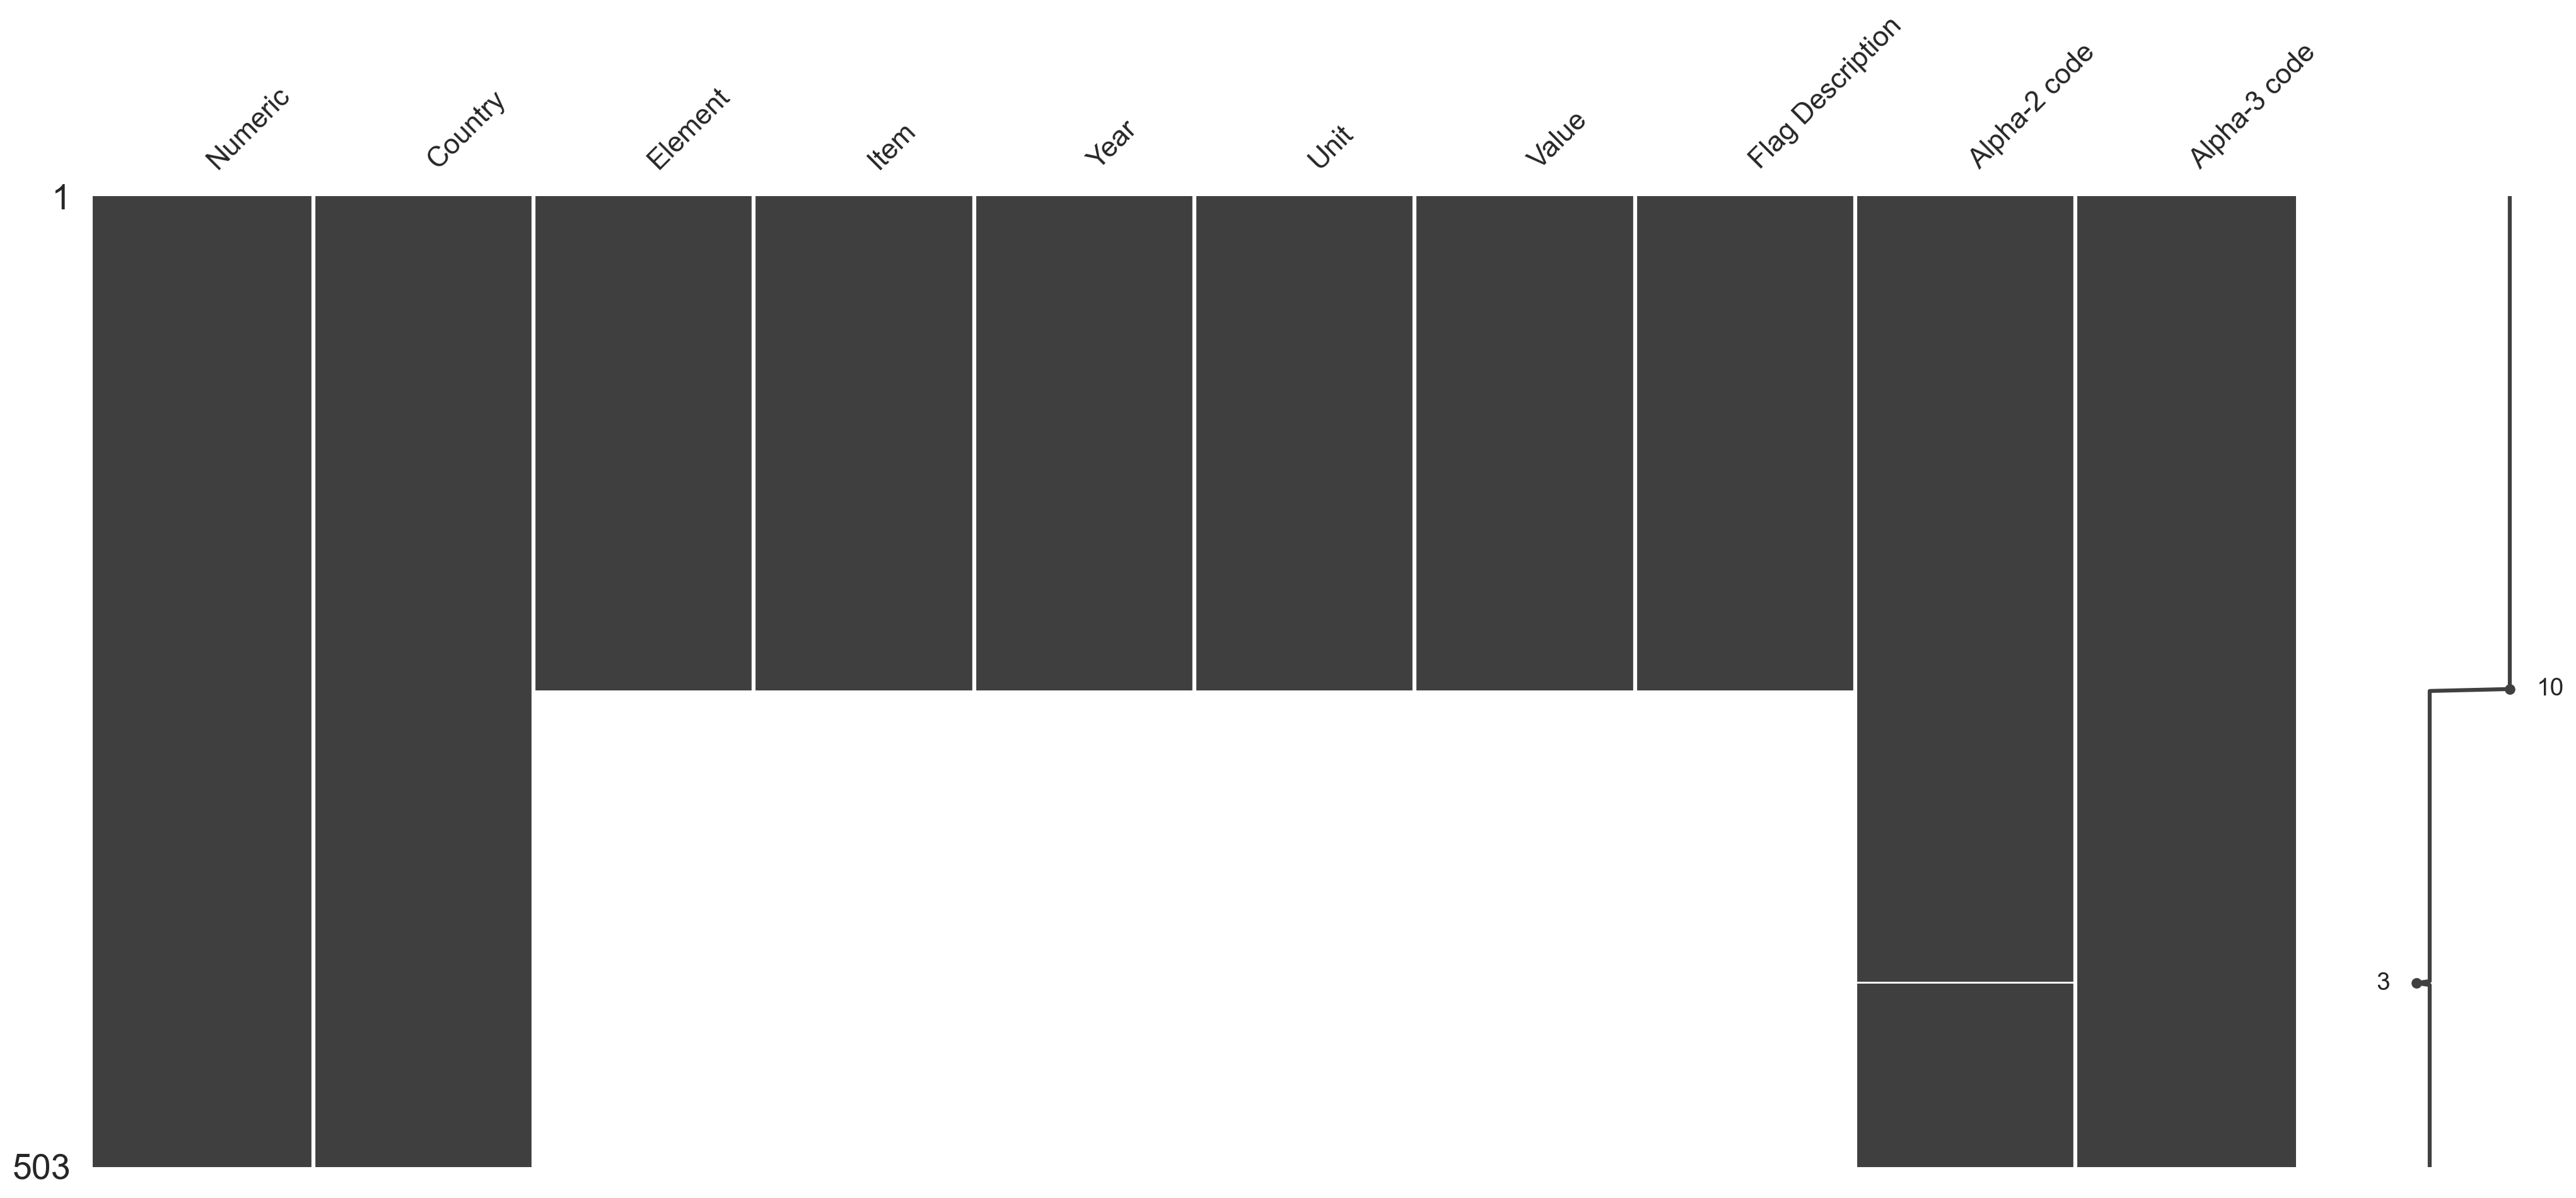

In [83]:
msno.matrix(df2) 

In [84]:
df2 = df2.dropna()
df2.isnull().sum()

Numeric             0
Country             0
Element             0
Item                0
Year                0
Unit                0
Value               0
Flag Description    0
Alpha-2 code        0
Alpha-3 code        0
dtype: int64

In [85]:
# convert float64 in "Y" col to int.
df2['Year'] = df2['Year'].astype(int)  
df2['Value'] = df2['Value'].astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Numeric           256 non-null    int64 
 1   Country           256 non-null    object
 2   Element           256 non-null    object
 3   Item              256 non-null    object
 4   Year              256 non-null    int64 
 5   Unit              256 non-null    object
 6   Value             256 non-null    int64 
 7   Flag Description  256 non-null    object
 8   Alpha-2 code      256 non-null    object
 9   Alpha-3 code      256 non-null    object
dtypes: int64(3), object(7)
memory usage: 22.0+ KB


In [86]:
df2['Country'].value_counts()

Ireland    169
Ukraine     87
Name: Country, dtype: int64

In [87]:
df2.describe()


,Numeric,Year,Value
count,256.0000,256.000000,256.000000
mean,518.8125,1994.753906,25327.480469
std,205.0202,16.566147,45998.212567
min,372.0000,1961.000000,160.000000
25%,372.0000,1982.000000,2930.750000
50%,372.0000,1997.000000,7900.000000
75%,804.0000,2008.000000,15296.000000
max,804.0000,2020.000000,241071.000000


## Dashboard

In [88]:
import ipywidgets as widgets
style = {'description_width': 'initial'}
limit_case = widgets.IntSlider(
    value=1000,
    min=100,
    max=5000,
    step=1,
    description='Max Number of Case:',
    disabled=False,
    style=style)

In [89]:
def update_df_length(limit):
    
    df = df2
    df = df.iloc[0:limit, :]
    
    print("Number of rows in the dataset that have been successfully loaded:"+str(len(df)))

In [90]:
from ipywidgets import Layout

unique_country = df2.Country.unique()

country = widgets.SelectMultiple(
    options = unique_country.tolist(),
    value = ['Ukraine'],
    description='District',
    disabled=False,
    layout = Layout(width='50%', height='80px', display='flex')
)

In [91]:
unique_year = df2.Year.unique()

style = {'description_width': 'initial'}

year = widgets.SelectMultiple(
    options = unique_year.tolist(),
    value = [2019],
    description='Criminal Case',
    disabled=False,
    style=style,
    layout = Layout(width='50%', height='80px')
)

In [92]:
from folium import plugins

In [93]:
import plotly.express as px


In [94]:
def update_map(country, year, limit):
    fig = px.choropleth(df2, locations="Alpha-3 code",
                    color="Value", 
                    hover_name="Country", 
                    # column to add to hover information
                    animation_frame="Year",
                    range_color=(0, 19782),
                    # column on which to animate
                    color_continuous_scale=px.colors.sequential.Plasma)
    fig.update_layout(
    # add a title text for the plot
    title_text = 'Value',
    # set projection style for the plot
     
    geo = dict(projection={'type':'natural earth'}) # by default, projection type is set to 'equirectangular'
)
    fig.show()


In [95]:
widgets.interactive(update_map, country = country, year = year, limit=limit_case)

interactive(children=(SelectMultiple(description='District', index=(1,), layout=Layout(display='flex', height=…

In [96]:
fig = px.choropleth(df2,
                    locations="Alpha-3 code",
                    color="Value", 
                    # column by which to color-code
                    hover_name="Country",
                    animation_frame="Year",
                    range_color=(0, 19782),
                    # column to display in hover information
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.update_layout(
    # add a title text for the plot
    title_text = 'Value Strawberries',
    geo_scope = 'europe' 
# can be set to north america | south america | africa | asia | europe | usa
)
fig.show()


# Machine Learning

In [97]:
df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0,A,Official figure


In [98]:
df_ireland_1=df_ireland.drop(columns=['Element','Item','Unit','Item Code (CPC)','Domain Code','Domain','Year Code','Area Code (M49)','Area','Element Code','Item Code (CPC)','Flag'])
df_ireland_1.head()

,Year,Value,Flag Description
0,2018,0,Official figure
1,2019,0,Official figure
2,2020,0,Official figure
3,2018,0,Official figure
4,2019,0,Official figure


In [99]:
df_ireland_1 = pd.get_dummies(df_ireland_1, columns = ['Flag Description'], prefix = 'Flag', drop_first=False)
df_ireland_1.head()

,Year,Value,Flag_Estimated value,Flag_Imputed value,Flag_Official figure,Flag_Unofficial figure
0,2018,0,0,0,1,0
1,2019,0,0,0,1,0
2,2020,0,0,0,1,0
3,2018,0,0,0,1,0
4,2019,0,0,0,1,0


In [100]:
df_ireland_1 = df_ireland_1.query("Year==2020")
df_ireland_1.head()

,Year,Value,Flag_Estimated value,Flag_Imputed value,Flag_Official figure,Flag_Unofficial figure
2,2020,0,0,0,1,0
5,2020,0,0,0,1,0
65,2020,710,0,0,1,0
185,2020,19470,0,0,1,0
188,2020,0,0,0,1,0


In [101]:
# Сбросим индекс DataFrame и полностью удалим старый индекс
df_ireland_1.reset_index(drop= True , inplace= True )
df_ireland_1.head()

,Year,Value,Flag_Estimated value,Flag_Imputed value,Flag_Official figure,Flag_Unofficial figure
0,2020,0,0,0,1,0
1,2020,0,0,0,1,0
2,2020,710,0,0,1,0
3,2020,19470,0,0,1,0
4,2020,0,0,0,1,0


In [102]:
df_ireland_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Year                    150 non-null    int64
 1   Value                   150 non-null    int64
 2   Flag_Estimated value    150 non-null    uint8
 3   Flag_Imputed value      150 non-null    uint8
 4   Flag_Official figure    150 non-null    uint8
 5   Flag_Unofficial figure  150 non-null    uint8
dtypes: int64(2), uint8(4)
memory usage: 3.1 KB


In [103]:
df_ireland_1['Flag_Official figure'].value_counts()

1    130
0     20
Name: Flag_Official figure, dtype: int64

## Dealing with an unbalanced data set

<AxesSubplot:ylabel='Flag_Official figure'>

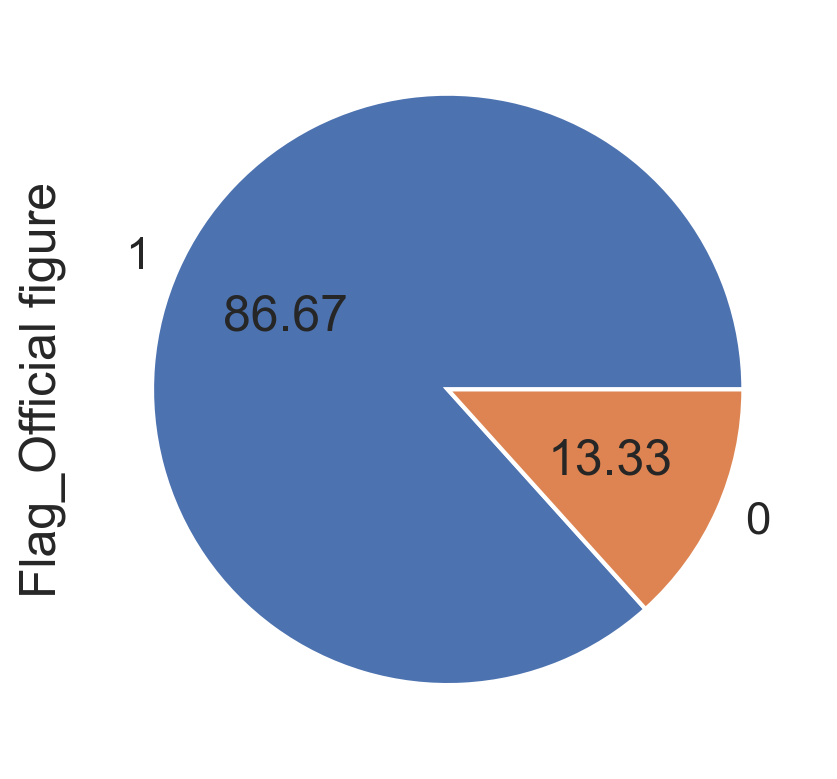

In [104]:
df_ireland_1['Flag_Official figure'].value_counts().plot.pie(autopct= '%.2f')

In [105]:
class_1 = df_ireland_1[df_ireland_1['Flag_Official figure'] == 1]
class_2  = df_ireland_1[df_ireland_1['Flag_Official figure'] == 0]
print(class_1.shape)
print(class_2.shape)

(130, 6)
(20, 6)


In [106]:
from sklearn.utils import resample
class_1_downsample = resample(class_1,
             replace=True,
             n_samples=len(class_2),
             random_state=42)

print(class_1_downsample.shape)

(20, 6)


In [107]:
data_downsampled = pd.concat([class_1_downsample, class_2])

In [108]:
df_ireland_1 = data_downsampled.copy()
df_ireland_1.reset_index(inplace = True,drop = True)

<AxesSubplot:ylabel='Flag_Official figure'>

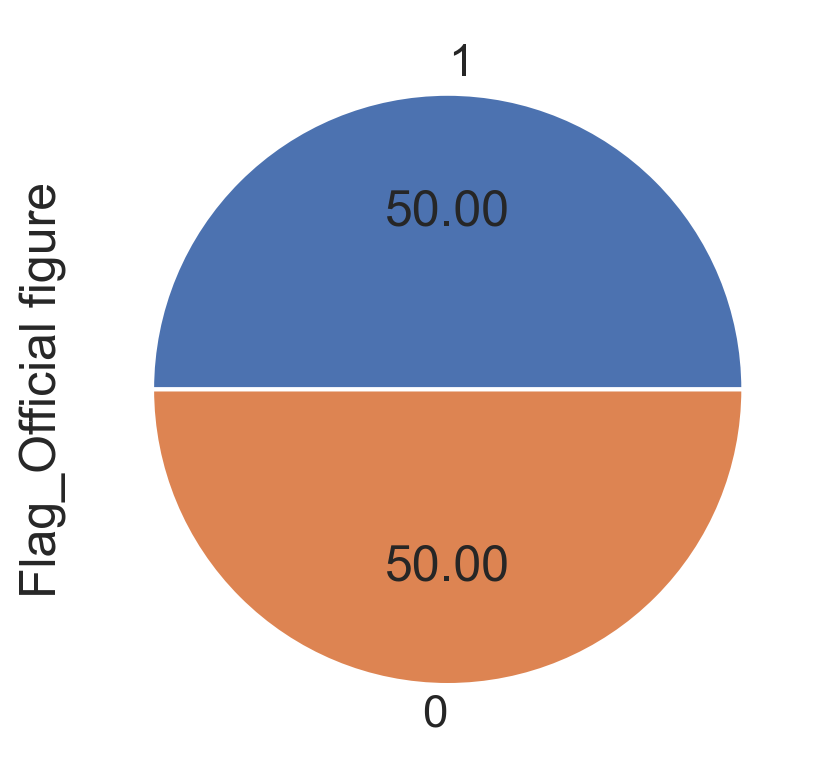

In [109]:
df_ireland_1['Flag_Official figure'].value_counts().plot.pie(autopct= '%.2f')

### Applying ML Models
NOW THE DATA EXPLORATION, ANALYSIS AND VISUALIZATION AND PREPROCESSING HAS BEEN DONE AND NOW WE CAN MOVE TO MODELLING PART.

In [110]:
# Spliting the dataset into independent and dependent variables
X = df_ireland_1.drop(['Flag_Official figure','Year'],axis=1)
y = df_ireland_1['Flag_Official figure']

In [111]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Display the rows and coulmns of X, y, X_train, y_train, X_test, y_test
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40, 4), (40,), (28, 4), (28,), (12, 4), (12,))

In [112]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB

# Create and initialise an object sc by calling a method GaussianNB()
nvclassifier = GaussianNB()

# Train the model by calling a method fit()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [113]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)

# Display the predicted values
print(y_pred)

[0 1 1 1 1 1 0 1 0 1 1 1]


In [114]:
# Check the actual and predicted value side by side
y_compare = np.vstack((y_test, y_pred)).T
# actual value on the left side and predicted value on the right hand side
# printing the top 10 values
y_compare[:10, :]

array([[1, 0],
       [1, 1],
       [1, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1]], dtype=uint8)

In [115]:
# Construct the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2 3]
 [1 6]]


In [116]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

Accuracy: 0.6666666666666666
Accuracy: 0.67


### Use of Cross Validation

In [117]:
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 5).mean()

0.8

## Creating a K-Nearest Neighbor Classifier


In [118]:
X = df_ireland_1.drop(['Flag_Official figure','Year'],axis=1)
y = df_ireland_1['Flag_Official figure']

from sklearn.model_selection import train_test_split
train_data,test_data,train_label,test_label = train_test_split(X, y, test_size=0.3, random_state=42)

In [119]:
from sklearn.neighbors import KNeighborsClassifier

In [120]:
neighbors = np.arange(1, 9)                  # number of neighbors
train_accuracy = np.zeros(len(neighbors))    # Declare and initialise the matrix
test_accuracy = np.zeros(len(neighbors))     # Declare and initialise the matrix

In [121]:
for i,k in enumerate(neighbors):                          # for loop that checks the model for neighbor values 1, 2, 3, ..., 9
    knn = KNeighborsClassifier(n_neighbors = k)           # Initialise an object knn using KNeighborsClassifier method

    #Fit the model
    knn.fit(train_data, train_label)                      # Call fit method to implement the ML KNeighborsClassifier model

    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_data, train_label)   # Save the score value in the train_accuracy array

    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_data, test_label)


KNeighborsClassifier(n_neighbors=1)

KNeighborsClassifier(n_neighbors=2)

KNeighborsClassifier(n_neighbors=3)

KNeighborsClassifier(n_neighbors=4)

KNeighborsClassifier()

KNeighborsClassifier(n_neighbors=6)

KNeighborsClassifier(n_neighbors=7)

KNeighborsClassifier(n_neighbors=8)

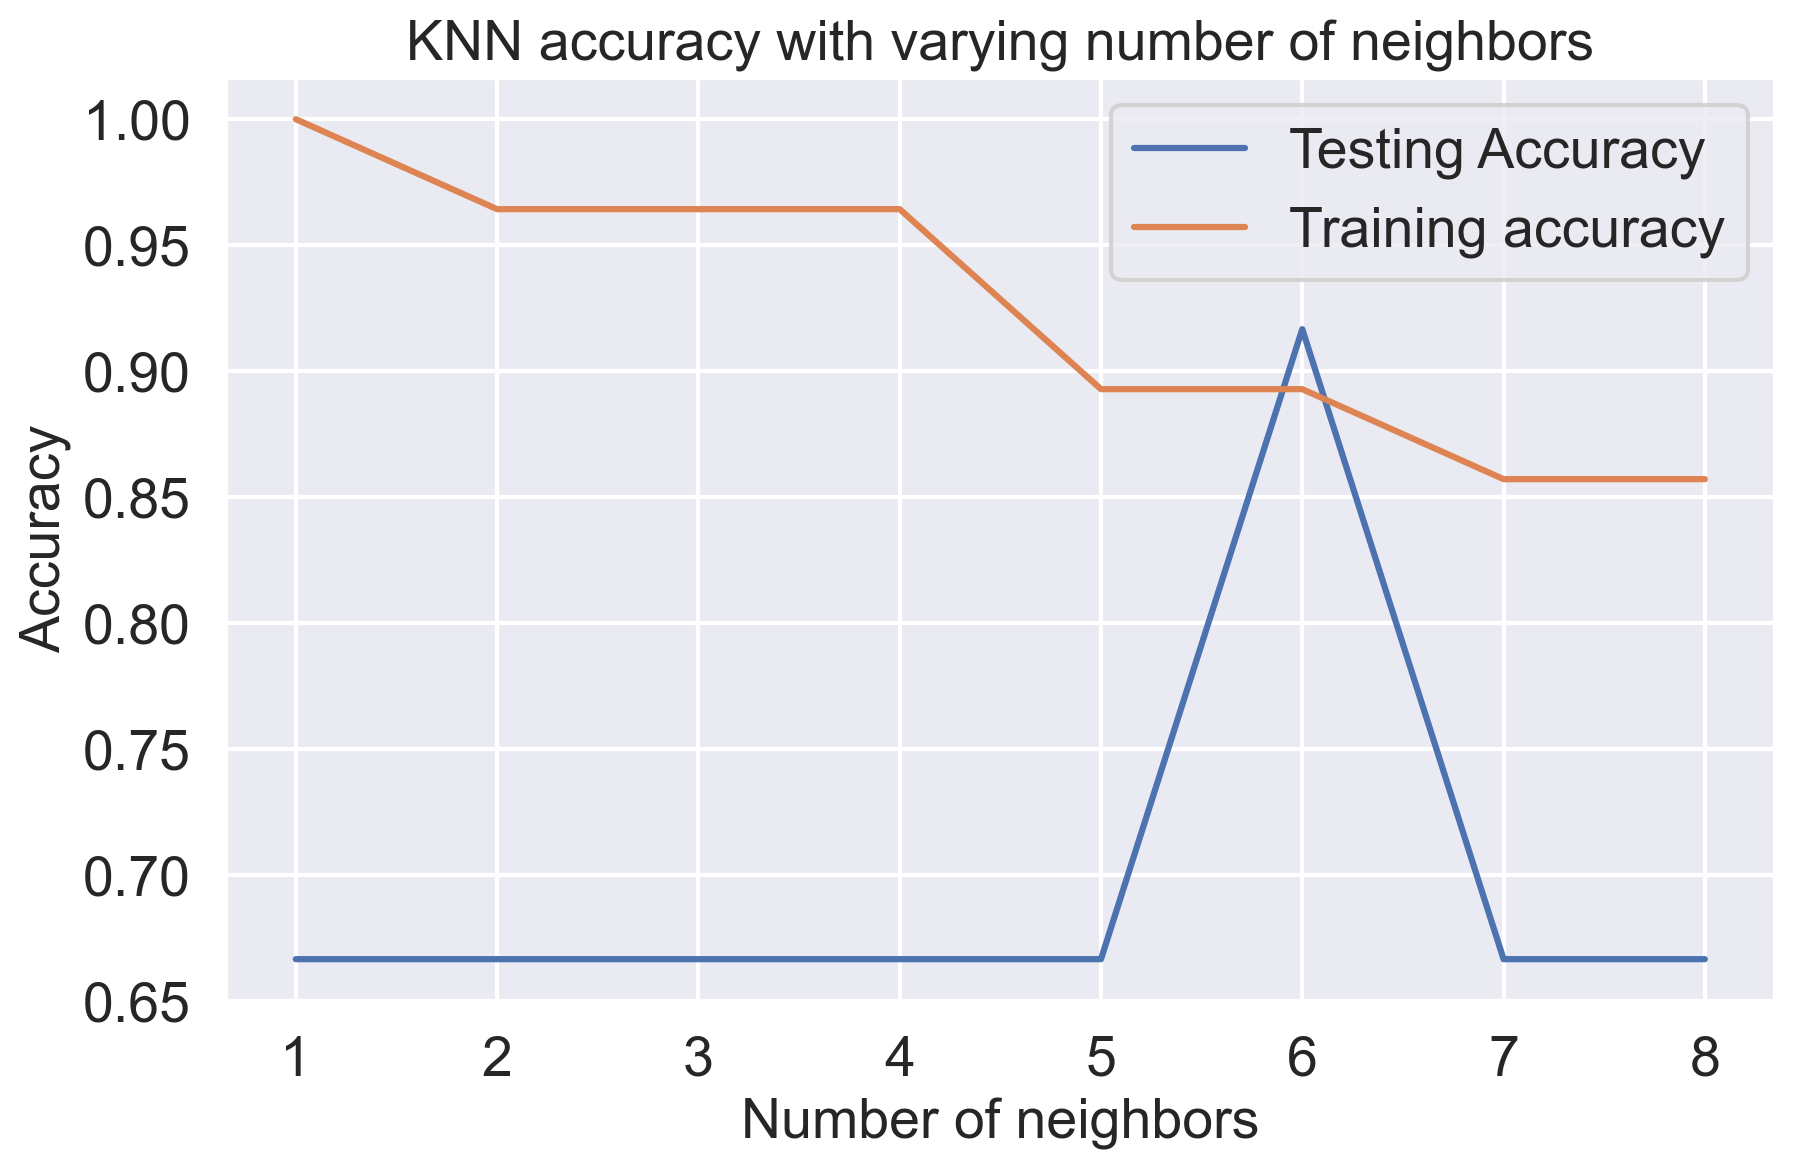

In [122]:
# Delcare the size of the array
plt.figure(figsize = (10, 6))
plt.title('KNN accuracy with varying number of neighbors', fontsize = 20)
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend(prop = {'size': 20})
plt.xlabel('Number of neighbors', fontsize = 20)
plt.ylabel('Accuracy', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show();

In [123]:
# Declare and initialise an object 'KNeighborsClassifier' with 3 neighbors 
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the model
knn.fit(train_data, train_label)

# Compute accuracy on the training set
train_accuracy = knn.score(train_data, train_label)

# Compute accuracy on the test set
test_accuracy = knn.score(test_data, test_label)

KNeighborsClassifier(n_neighbors=6)

In [124]:
# Display the test accuracy
print(test_accuracy)

0.9166666666666666


### Use of Cross Validation

In [125]:
from sklearn.model_selection import cross_val_score
nvclassifier = knn
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 5).mean()

0.825

We obtain the model accuracy to classify 83% of the testing data correctly. With a few lines of code, we were able to train an ML model that is now able to tell you the type 'Official figure' by using only four features with 83% accuracy.

### Confusion Matrix


In [126]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix

# Predict the results by calling a method 'predict()'
prediction = knn.predict(test_data)

# Display the confusion matrix
confusion_matrix(test_label, prediction)

array([[5, 0],
       [1, 6]])

### Classification Report


In [127]:
# import the library classification_report
from sklearn.metrics import classification_report

# Display the report
print(classification_report(test_label, prediction))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.86      0.92         7

    accuracy                           0.92        12
   macro avg       0.92      0.93      0.92        12
weighted avg       0.93      0.92      0.92        12



## Linear Regression

In [128]:
lrm = LinearRegression()
lrm.fit(X_train, y_train) 

LinearRegression()

In [129]:
# prediction of model

y_pred = lrm.predict(X_test)

# training accuracy of model

lrm.score(X_train, y_train)

1.0

In [130]:
# test accuracy of model

lrm.score(X_test, y_test)

1.0

In [131]:
# creating a function to create adhusted R-Squared

def adj_r2(X, y, model):
    r2 = model.score(X, y)
    n = X.shape[0]
    p = X.shape[1]
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return adjusted_r2

In [132]:
print(adj_r2(X_train, y_train, lrm))

1.0


In [133]:
print(adj_r2(X_test, y_test, lrm))

1.0


### Ridge Regression

In [134]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Ridge(), param_grid={'alpha': [0.01, 0.1, 1]}, verbose=1)

In [135]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.9999968154842956
-----Test set statistics-----
R-squared of the model in test set is: 0.9999958966120274
Root mean squared error of the prediction is: 0.0009986747435151851
Mean absolute percentage error of the prediction is: inf


### Lasso Regression

In [136]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1]}, verbose=1)

In [137]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

R-squared of the model in training set is: 0.9974921891329478
-----Test set statistics-----
R-squared of the model in test set is: 0.9967685754624803
Root mean squared error of the prediction is: 0.028025268708840062
Mean absolute percentage error of the prediction is: inf


In [138]:
data = [['Naive Bayes',0.8],['K-Nearest Neighbor Classifier',0.825],['Linear Regression',1], ['Lasso',0.99], ['Ridge',0.99]]
summary = pd.DataFrame(data, columns=['Model', 'R2 Score'])
summary

,Model,R2 Score
0,Naive Bayes,0.800
1,K-Nearest Neighbor Classifier,0.825
2,Linear Regression,1.000
3,Lasso,0.990
4,Ridge,0.990


# Sentimental analysis

In [139]:
df_ireland.head()

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2018,2018,ha,0,A,Official figure
1,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2019,2019,ha,0,A,Official figure
2,QCL,Crops and livestock products,372,Ireland,5312,Area harvested,01371,"Almonds, in shell",2020,2020,ha,0,A,Official figure
3,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2018,2018,tonnes,0,A,Official figure
4,QCL,Crops and livestock products,372,Ireland,5510,Production,01371,"Almonds, in shell",2019,2019,tonnes,0,A,Official figure


In [140]:
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7581 entries, 0 to 9750
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Domain Code       7581 non-null   object
 1   Domain            7581 non-null   object
 2   Area Code (M49)   7581 non-null   int64 
 3   Area              7581 non-null   object
 4   Element Code      7581 non-null   int64 
 5   Element           7581 non-null   object
 6   Item Code (CPC)   7581 non-null   object
 7   Item              7581 non-null   object
 8   Year Code         7581 non-null   int64 
 9   Year              7581 non-null   int64 
 10  Unit              7581 non-null   object
 11  Value             7581 non-null   int64 
 12  Flag              7581 non-null   object
 13  Flag Description  7581 non-null   object
dtypes: int64(5), object(9)
memory usage: 888.4+ KB


In [141]:
# Delete unwanted columns

df_ireland=df_ireland.drop(columns=['Value','Element','Unit','Domain Code','Domain','Year Code','Area Code (M49)','Area','Element Code','Item Code (CPC)','Flag','Year'])
df_ireland.head()

,Item,Flag Description
0,"Almonds, in shell",Official figure
1,"Almonds, in shell",Official figure
2,"Almonds, in shell",Official figure
3,"Almonds, in shell",Official figure
4,"Almonds, in shell",Official figure


In [142]:
# In the Flag Description column we have 4 values, let's consider only two of them: 
values = ['Imputed value', 'Unofficial figure']
df_ireland_sentimental = df_ireland[df_ireland["Flag Description"].isin (values) == False ]

In [143]:
# convert label to a numerical variable
df_ireland_sentimental['Flag Description'] = df_ireland_sentimental['Flag Description'].map({'Official figure':0, 'Estimated value':1})
df_ireland_sentimental

,Item,Flag Description
0,"Almonds, in shell",0
1,"Almonds, in shell",0
2,"Almonds, in shell",0
3,"Almonds, in shell",0
4,"Almonds, in shell",0
...,...,...
9737,"Whole milk, evaporated",0
9738,"Whole milk, evaporated",0
9748,"Whole milk, evaporated",1
9749,"Whole milk, evaporated",1


In [144]:
# Rows containing duplicate data 
duplicate_rows_df_ireland_sentimental = df_ireland_sentimental[df_ireland_sentimental.duplicated()]
print("number of duplicate rows:", duplicate_rows_df_ireland_sentimental.shape)

number of duplicate rows: (5517, 2)


In [145]:
df_ireland_sentimental = df_ireland_sentimental.drop_duplicates ()

In [146]:
df_ireland_sentimental = df_ireland_sentimental.groupby('Item')['Flag Description'].sum().reset_index()
df_ireland_sentimental.head()

,Item,Flag Description
0,"Almonds, in shell",0
1,Apples,1
2,Apricots,0
3,Asses,1
4,Avocados,0


In [147]:
numpy_array = df_ireland_sentimental.values
X = numpy_array[:,0]
Y = numpy_array[:,1]
Y = Y.astype('int')
print("X")
print(X)
print("Y")
print(Y)

X
['Almonds, in shell' 'Apples' 'Apricots' 'Asses' 'Avocados' 'Bananas'
 'Barley' 'Beans, dry' 'Broad beans and horse beans, dry'
 'Broad beans and horse beans, green' 'Buffalo' 'Butter of cow milk'
 'Cabbages' 'Cantaloupes and other melons' 'Carrots and turnips'
 'Cauliflowers and broccoli' 'Cereals n.e.c.' 'Cheese from whole cow milk'
 'Chestnuts, in shell' 'Chickens'
 'Chillies and peppers, green (Capsicum spp. and Pimenta spp.)'
 'Coconut oil' 'Cotton seed' 'Cottonseed oil' 'Cream, fresh'
 'Cucumbers and gherkins' 'Currants' 'Ducks'
 'Edible offal of goat, fresh, chilled or frozen'
 'Edible offals of horses and other equines,  fresh, chilled or frozen'
 'Eggplants (aubergines)' 'Figs' 'Geese' 'Goat fat, unrendered' 'Goats'
 'Grapes' 'Groundnut oil' 'Hazelnuts, in shell' 'Hen eggs in shell, fresh'
 'Hop cones' 'Horse meat, fresh or chilled' 'Horses' 'Kiwi fruit'
 'Leeks and other alliaceous vegetables' 'Lemons and limes'
 'Lettuce and chicory' 'Linseed' 'Lupins' 'Maize (corn)'
 'Mar

Breaking down X in individual words and putting them all in a bag. Then we pick all the unique words from the bag one by one and make a dictionary of unique words.

This is called vectorization of words. We have the class CountVectorizer() in scikit learn to vectorize the words. 

In [148]:
# create an object of CountVectorizer() class 
from sklearn.feature_extraction.text import CountVectorizer 
vec = CountVectorizer( )

Here vec is an object of class CountVectorizer(). This has a method called fit() which converts a corpus of documents into a vector of unique words as shown below.

In [149]:
vec.fit(X)
vec.vocabulary_

CountVectorizer()

{'almonds': 1,
 'in': 86,
 'shell': 148,
 'apples': 3,
 'apricots': 4,
 'asses': 5,
 'avocados': 7,
 'bananas': 8,
 'barley': 9,
 'beans': 10,
 'dry': 47,
 'broad': 14,
 'and': 2,
 'horse': 84,
 'green': 74,
 'buffalo': 16,
 'butter': 17,
 'of': 114,
 'cow': 42,
 'milk': 104,
 'cabbages': 18,
 'cantaloupes': 20,
 'other': 123,
 'melons': 103,
 'carrots': 22,
 'turnips': 172,
 'cauliflowers': 24,
 'broccoli': 15,
 'cereals': 26,
 'cheese': 27,
 'from': 60,
 'whole': 182,
 'chestnuts': 28,
 'chickens': 29,
 'chillies': 32,
 'peppers': 129,
 'capsicum': 21,
 'spp': 156,
 'pimenta': 131,
 'coconut': 35,
 'oil': 117,
 'cotton': 40,
 'seed': 145,
 'cottonseed': 41,
 'cream': 43,
 'fresh': 59,
 'cucumbers': 44,
 'gherkins': 66,
 'currants': 45,
 'ducks': 48,
 'edible': 49,
 'offal': 115,
 'goat': 67,
 'chilled': 31,
 'or': 121,
 'frozen': 61,
 'offals': 116,
 'horses': 85,
 'equines': 52,
 'eggplants': 50,
 'aubergines': 6,
 'figs': 57,
 'geese': 64,
 'fat': 56,
 'unrendered': 174,
 'goats': 

```Countvectorizer()``` has converted the documents into a set of unique words alphabetically sorted and indexed.


**Stop Words**

We can see a few trivial words such as  'and','is','of', etc. These words don't really make any difference in classyfying a document. These are called 'stop words'. So we would like to get rid of them. 

We can remove them by passing a parameter stop_words='english' while instantiating ```Countvectorizer()``` as follows:

In [150]:
# removing the stop words
vec = CountVectorizer(stop_words='english' )
vec.fit(X)
vec.vocabulary_

CountVectorizer(stop_words='english')

{'almonds': 1,
 'shell': 141,
 'apples': 2,
 'apricots': 3,
 'asses': 4,
 'avocados': 6,
 'bananas': 7,
 'barley': 8,
 'beans': 9,
 'dry': 46,
 'broad': 13,
 'horse': 82,
 'green': 72,
 'buffalo': 15,
 'butter': 16,
 'cow': 41,
 'milk': 101,
 'cabbages': 17,
 'cantaloupes': 19,
 'melons': 100,
 'carrots': 21,
 'turnips': 164,
 'cauliflowers': 23,
 'broccoli': 14,
 'cereals': 25,
 'cheese': 26,
 'chestnuts': 27,
 'chickens': 28,
 'chillies': 31,
 'peppers': 122,
 'capsicum': 20,
 'spp': 149,
 'pimenta': 124,
 'coconut': 34,
 'oil': 113,
 'cotton': 39,
 'seed': 138,
 'cottonseed': 40,
 'cream': 42,
 'fresh': 58,
 'cucumbers': 43,
 'gherkins': 64,
 'currants': 44,
 'ducks': 47,
 'edible': 48,
 'offal': 111,
 'goat': 65,
 'chilled': 30,
 'frozen': 59,
 'offals': 112,
 'horses': 83,
 'equines': 51,
 'eggplants': 49,
 'aubergines': 5,
 'figs': 56,
 'geese': 62,
 'fat': 55,
 'unrendered': 166,
 'goats': 66,
 'grapes': 70,
 'groundnut': 73,
 'hazelnuts': 75,
 'hen': 77,
 'eggs': 50,
 'hop': 81

Another way of printing the 'vocabulary':

In [151]:
# printing feature names
print(vec.get_feature_names())
print(len(vec.get_feature_names()))

['alliaceous', 'almonds', 'apples', 'apricots', 'asses', 'aubergines', 'avocados', 'bananas', 'barley', 'beans', 'beet', 'berries', 'bone', 'broad', 'broccoli', 'buffalo', 'butter', 'cabbages', 'cane', 'cantaloupes', 'capsicum', 'carrots', 'cattle', 'cauliflowers', 'centrifugal', 'cereals', 'cheese', 'chestnuts', 'chickens', 'chicory', 'chilled', 'chillies', 'citrus', 'clementines', 'coconut', 'colza', 'condensed', 'cones', 'corn', 'cotton', 'cottonseed', 'cow', 'cream', 'cucumbers', 'currants', 'dehydrated', 'dry', 'ducks', 'edible', 'eggplants', 'eggs', 'equines', 'equivalent', 'evaporated', 'excluding', 'fat', 'figs', 'fleece', 'fresh', 'frozen', 'fruit', 'fruits', 'geese', 'genus', 'gherkins', 'goat', 'goats', 'gourds', 'grain', 'grapefruits', 'grapes', 'greasy', 'green', 'groundnut', 'groundnuts', 'hazelnuts', 'hemp', 'hen', 'hides', 'hinnies', 'honey', 'hop', 'horse', 'horses', 'including', 'kernel', 'kids', 'kiwi', 'lambs', 'leeks', 'lemons', 'lettuce', 'limes', 'linseed', 'lupi

So our final dictionary is made of 181 words (after discarding the stop words). Now, to do classification, we need to represent all the documents with respect to these words in the form of features.

Every document will be converted into a feature vector representing presence of these words in that document. Let's convert each of our training documents in to a feature vector.

In [152]:
# another way of representing the features
X_transformed=vec.transform(X)
X_transformed

<123x176 sparse matrix of type '<class 'numpy.int64'>'
	with 293 stored elements in Compressed Sparse Row format>

You can see X_tranformed is a 134 x 181 sparse matrix. It has 134 rows for each of our 134 documents and 181 columns each for one word of the dictionary which we just created. Let us print X_transformed.


In [153]:
print(X_transformed)

  (0, 1)	1
  (0, 141)	1
  (1, 2)	1
  (2, 3)	1
  (3, 4)	1
  (4, 6)	1
  (5, 7)	1
  (6, 8)	1
  (7, 9)	1
  (7, 46)	1
  (8, 9)	2
  (8, 13)	1
  (8, 46)	1
  (8, 82)	1
  (9, 9)	2
  (9, 13)	1
  (9, 72)	1
  (9, 82)	1
  (10, 15)	1
  (11, 16)	1
  (11, 41)	1
  (11, 101)	1
  (12, 17)	1
  (13, 19)	1
  (13, 100)	1
  :	:
  (109, 155)	1
  (110, 33)	1
  (110, 97)	1
  (110, 156)	1
  (111, 158)	1
  (112, 159)	1
  (113, 76)	1
  (113, 133)	1
  (113, 135)	1
  (113, 161)	1
  (114, 163)	1
  (115, 157)	1
  (115, 165)	1
  (116, 141)	1
  (116, 169)	1
  (117, 171)	1
  (118, 172)	1
  (119, 36)	1
  (119, 173)	1
  (120, 101)	1
  (120, 128)	1
  (121, 36)	1
  (121, 101)	1
  (122, 53)	1
  (122, 101)	1


Let us convert this sparse matrix into a more easily interpretable array:

In [154]:
# converting transformed matrix back to an array
# note the high number of zeros
X=X_transformed.toarray()
X

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

To make better sense of the dataset, let us examine the vocabulary and document-term matrix together in a pandas dataframe. The way to convert a matrix into a dataframe is pd.DataFrame(matrix, columns=columns)

In [155]:
# converting matrix to dataframe
pd.DataFrame(X, columns=vec.get_feature_names())

,alliaceous,almonds,apples,apricots,asses,aubergines,avocados,bananas,barley,beans,...,unrendered,vaccinium,vegetables,walnuts,washed,watermelons,wheat,whey,wild,wool
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This table shows how many times a particular word occurs in document. In other words, this is a frequency table of the words.

In [156]:
test_df =df_ireland_sentimental.sample()
test_df

,Item,Flag Description
33,"Goat fat, unrendered",0


In [157]:
test_numpy_array = test_df.values
X_test = test_numpy_array[:,0]
Y_test = test_numpy_array[:,1]
Y_test = Y_test.astype('int')
print("X_test")
print(X_test)
print("Y_test")
print(Y_test)

X_test
['Goat fat, unrendered']
Y_test
[0]


In [158]:
X_test_transformed=vec.transform(X_test)
X_test_transformed

<1x176 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [159]:
X_test=X_test_transformed.toarray()
X_test

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

## Multinomial Naive Bayes

In [160]:
# building a multinomial NB model
from sklearn.naive_bayes import MultinomialNB

# instantiate NB class
mnb=MultinomialNB()

# fitting the model on training data
mnb.fit(X,Y)

# predicting probabilities of test data
mnb.predict_proba(X_test)

MultinomialNB()

array([[0.91933125, 0.08066875]])

In [161]:
proba=mnb.predict_proba(X_test)
print("probability of test document belonging to class Official figure" , proba[:,0])
print("probability of test document belonging to class Estimated value" , proba[:,1])

probability of test document belonging to class Official figure [0.91933125]
probability of test document belonging to class Estimated value [0.08066875]


In [162]:
pd.DataFrame(proba, columns=['Official figure','Estimated value'])


,Official figure,Estimated value
0,0.919331,0.080669


## Bernoulli Naive Bayes



In [163]:
from sklearn.naive_bayes import BernoulliNB

# instantiating bernoulli NB class
bnb=BernoulliNB()

# fitting the model
bnb.fit(X,Y)

# predicting probability of test data
bnb.predict_proba(X_test)
proba_bnb=bnb.predict_proba(X_test)

BernoulliNB()

array([[0.90865953, 0.09134047]])

In [164]:
test_df


,Item,Flag Description
33,"Goat fat, unrendered",0


In [165]:
pd.DataFrame(proba_bnb, columns=['Official figure','Estimated value'])

,Official figure,Estimated value
0,0.90866,0.09134


## Milk prices in Ireland

On this page, you will find the monthly weighted average prices data for farm-gate raw milk (at real fat and protein content) in Ireland, published by the European Commission (Milk Market Observatory).

The prices collected over the last four years are listed in the table.

https://www.clal.it/en/index.php?section=latte_mmo&country=IE

In [166]:
df_milk = pd.read_excel('milk.xlsx')
# looking at the dataset
df_milk.head(12)

,Survey Date,2019 Year,2020 Year,2021 Year,2022 Year
0,January,34.28,34.67,35.64,46.03
1,February,34.38,34.86,37.20,47.59
2,March,32.63,31.66,37.10,48.95
3,April,31.66,30.01,36.61,51.28
4,May,31.47,30.59,37.49,53.61
5,June,31.95,31.76,37.39,55.45
6,July,31.08,32.83,37.20,57.78
7,August,31.95,33.89,39.23,59.73
8,September,34.48,36.61,42.44,64.29
9,October,36.61,39.14,46.52,68.47


In [167]:
df_milk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survey Date  12 non-null     object 
 1   2019 Year    12 non-null     float64
 2   2020 Year    12 non-null     float64
 3   2021 Year    12 non-null     float64
 4   2022 Year    12 non-null     float64
dtypes: float64(4), object(1)
memory usage: 608.0+ bytes


### Descriptive Statistics
The average value of mean and median is 50% of the price in 2021 - 40.33 and 37.44 It is easy to notice that the average price in 2022 increased by 42% compared to 2021. And by 71% compared to 2019.

In [168]:
df_milk.describe()

,2019 Year,2020 Year,2021 Year,2022 Year
count,12.000000,12.00000,12.000000,12.000000
mean,33.691667,34.38750,40.327500,57.640000
std,2.215314,3.17147,4.879156,8.572051
min,31.080000,30.01000,35.640000,46.030000
25%,31.877500,31.73500,37.175000,50.697500
50%,33.455000,34.28000,37.440000,56.615000
75%,34.990000,36.83000,43.460000,65.335000
max,37.290000,39.14000,48.650000,69.250000


<Figure size 1500x1000 with 0 Axes>

<AxesSubplot:>

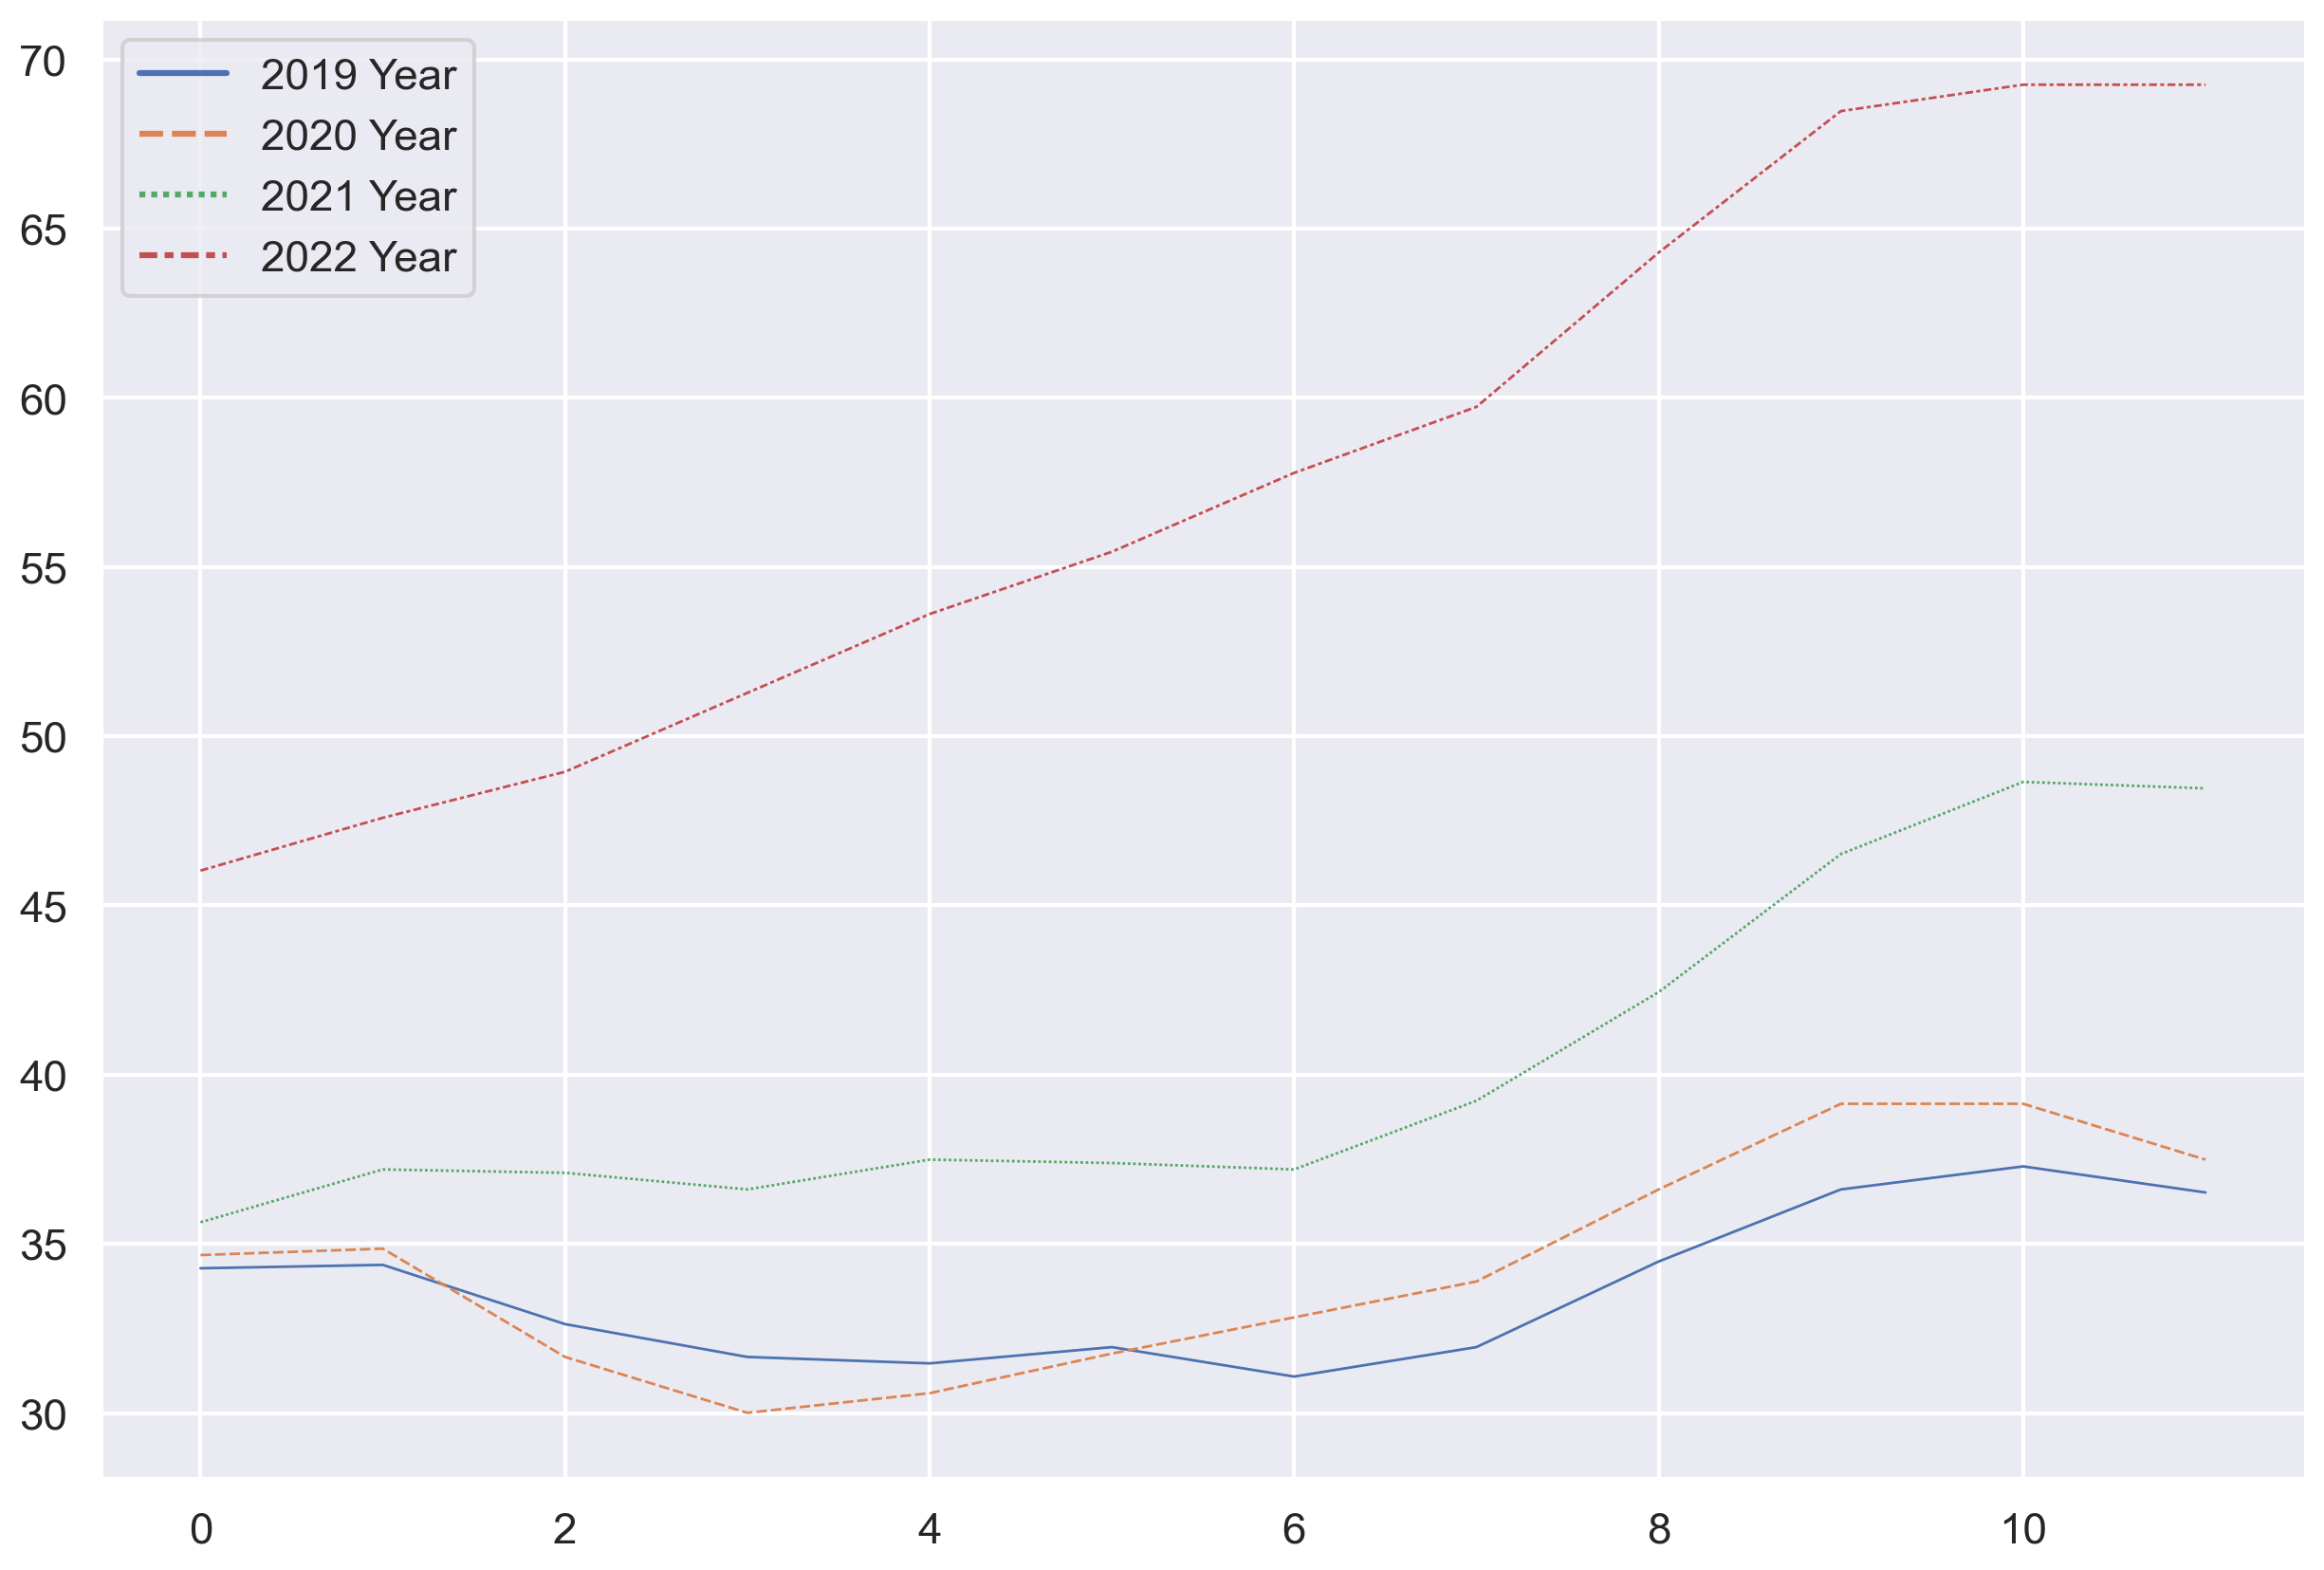

In [169]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_milk, estimator=None, lw=1)

# The graph visually shows how much milk prices have changed in 2022

Testing for normality in SCIPY At the heart of testing for “normality” is hypothesis testing. Null hypothesis – the data is normally distributed, alternative hypothesis – the data is not normally distributed.

In [170]:
import scipy
from scipy import stats

stat, p = scipy.stats.shapiro(df_milk['2022 Year']) # Shapiro-Wilk test
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Accept the normality hypothesis')
else:
    print('Thus, the null hypothesis of having a normal distribution of the dataset is rejected.')

Statistics=0.915, p-value=0.248
Accept the normality hypothesis


In [171]:
# convert float64 in "2022 Year" col to int.
df_milk['2022 Year'] = df_milk['2022 Year'].astype(int)  

In [172]:
half = len(df_milk['2022 Year']) / 2
sam1 = df_milk.loc[:half, '2022 Year']
sam2 = df_milk.loc[half:, '2022 Year']
scipy.stats.ttest_ind(sam2, sam1)

Ttest_indResult(statistic=5.074692932700854, pvalue=0.00035794337674861787)

As you can see, the p-value is less than 0.05, which indicates the validity of the null hypothesis. The data is normally distributed. In addition, it is necessary to check whether the calculated t-statistic exceeds the tabular one. To do this, we will choose 95% as the confidence interval. In the stats module, you can see the table value thanks to the t.ppf function. It takes as arguments the corresponding quartiles (with a 95% confidence interval, they will be 0.975 or 0.025, since this is a two-tailed test) and the total degree of freedom - the sum of the degrees of freedom of the samples.

In [173]:
dfs = (half - 1) + (half - 1)
scipy.stats.t.ppf(0.975, dfs)

2.2281388519649385

Does not exceed the calculated value of the t-statistic - 5.075. This means that we cannot reject the null hypothesis. From this we conclude: the means of the two samples are equal under the condition of their normal distribution.

A confidence interval is a range of numbers that covers the true mean of the data.

For example: if my confidence interval is between 53.28 and 62.05 with 95% confidence, that really means that 95% of the time I pick a number from this data set, it will be between 53.28 and 62.05

In [174]:
import scipy.stats as st
st.norm.interval(alpha=0.95, loc=np.mean(df_milk['2022 Year']), scale=st.sem(df_milk['2022 Year']))

(52.28262047811188, 62.05071285522145)

## Comparing milk prices in Ireland with milk prices in Germany and Italy in 2022

In [175]:
df_compare = pd.read_excel('milk_compare.xlsx')
df_compare.head(12)

,Survey Date,Ireland,Germany,Italy
0,January,46.03,41.66,41.5
1,February,47.59,43.12,42.5
2,March,48.95,44.86,43.5
3,April,51.28,47.20,48.0
4,May,53.61,49.59,48.0
5,June,55.45,52.08,48.5
6,July,57.78,55.04,55.0
7,August,59.73,56.77,55.0
8,September,64.29,58.18,57.0
9,October,68.47,59.33,57.0


In [176]:
df_compare = df_compare.dropna()
df_compare.isnull().sum()

Survey Date    0
Ireland        0
Germany        0
Italy          0
dtype: int64

In [177]:
df_compare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survey Date  12 non-null     object 
 1   Ireland      12 non-null     float64
 2   Germany      12 non-null     float64
 3   Italy        12 non-null     float64
dtypes: float64(3), object(1)
memory usage: 480.0+ bytes


## Shapiro-Wilk test

In the field of frequentist statistics, the Shapiro-Wilk test is a test for normality. This test is generally used for small samples of 50 elements or less.

The null hypothesis for the Shapiro-Wilk test is that the milk price is distributed normally. The alternate hypothesis, therefore, is that the milk price is not distributed normally.

In [178]:
import scipy
from scipy import stats

stat, p = scipy.stats.shapiro(df_compare['Ireland']) # Shapiro-Wilk test
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Accept the normality hypothesis')
else:
    print('Thus, the null hypothesis of having a normal distribution of the dataset is rejected.')

Statistics=0.915, p-value=0.248
Accept the normality hypothesis


This function tests the null hypothesis that a sample comes from a normal distribution. It is based on D’Agostino and Pearson’s test that combines skew and kurtosis to produce an omnibus test of normality.

In [179]:
stat, p = scipy.stats.normaltest(df_compare['Ireland']) 
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Accept the normality hypothesis')
else:
    print('Thus, the null hypothesis of having a normal distribution of the dataset is rejected.')

Statistics=2.563, p-value=0.278
Accept the normality hypothesis


In [180]:
data = [['Shapiro-Wilk test',0.248],['Pearson’s test',0.278]]
summary = pd.DataFrame(data, columns=['Test', 'p-value'])
summary

,Test,p-value
0,Shapiro-Wilk test,0.248
1,Pearson’s test,0.278


## One-way Analysis of Variance (ANOVA)

We want to see if the price of one country outperforms another, so our null hypothesis is that the average price in each group is equivalent to the average price in the other groups. For simplicity, we will consider 3 groups (countries "Ireland", "Germany", "Italy") of 12 months each.

In [181]:
a = df_compare['Ireland'].values
b = df_compare['Germany'].values
c = df_compare['Italy'].values

In [182]:
import scipy.stats as stats 
stats.f_oneway(a,b,c) 

F_onewayResult(statistic=2.563523709340257, pvalue=0.0922853211480521)

#### We conclude: The p-value is more 0.05, so the null is non rejected, and it can be concluded there are not differences between the treatment groups and the control.

## Student's t-test for independent groups

The Student’s t-Test is a statistical hypothesis test to compare whether two samples are expected to have been drawn from the same population. It is named for the pseudonym “Student” used by William Gosset, who developed the test.

The test works by checking the means from two samples to see if they are significantly different from each other. It does this by calculating the standard error in the difference between means, which can be interpreted to see how likely the difference is, if the two samples have the same mean (the null hypothesis).

The t-statistic calculated by the test can be interpreted by comparing it to critical values from the t-distribution. The critical value can be calculated using the degrees of freedom and a significance level with the percent point function (PPF).

We can interpret the statistic value in a two-tailed test, meaning that if we reject the null hypothesis, it could be because the first mean is smaller or greater than the second mean.

We can implement a function as shown below:

In [183]:
import scipy.stats as st

In [184]:
def independent_ttest(a, b, alpha=0.05):
    # calculate means
    mean1, mean2 = np.mean(a), np.mean(b)
    # calculate standard errors
    se1, se2 = st.sem(a), st.sem(b)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(a) + len(b) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p
    

In [185]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(a, b, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

t=1.636, df=22, cv=1.717, p=0.116

Fail to reject null hypothesis that the means are equal.
Fail to reject null hypothesis that the means are equal.


## Non-Parametric Hypothesis t-Test
Wilcoxon Signed-Rank, Mann-Whitney U, Kruskal-Wallis H, Friedman Test

### Mann-Whitney U Test
Tests whether the distributions of two independent samples are equal or not. The same as the One-sample t-test.
Assumptions:

*Observations in each sample are independent & identically distributed(iid)

*Observations in each sample can be ranked.

In [186]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(a, b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=95.000, p=0.194
Probably the same distribution


### Wilcoxon Signed-Rank Test
tests whether the distributions of two paired samples are equal or not. Sample like Paired t-Test

Assumptions:

Observations in each sample are independent & identically distributed (iid). Observations in each sample can be ranked. Observations across each sample are paired.

In [187]:
from scipy.stats import wilcoxon

stat, p = wilcoxon(a, b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


### Kruskal-Wallis H Test or One-way Anova
tests whether the distributions of two or more independent samples are equal or not.

What is the difference between Mann-Whitney and Kruskal-Wallis?

The major difference between the Mann-Whitney U and the Kruskal-Wallis H is simply that the latter can accommodate more than two groups.

The ANOVA (and t-test) is explicitly a test of equality of means of values. The Kruskal-Wallis (and Mann-Whitney) can be seen technically as a comparison of the mean ranks.

Assumptions:

Observations in each sample are independent and identically distributed (iid).
Observations in each sample can be ranked.


In [188]:
from scipy.stats import kruskal

stat, p = kruskal(a, b)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')

stat=1.764, p=0.184
Probably the same distribution


### Friedman Test
tests whether the distributions of two or more paired samples are equal or not alternative to the Repeated Measures ANOVA.

It is used to determine whether or not there is a statistically significant difference between the means of three or more groups in which the same subjects show up in each group.

Assumptions: Observations in each sample are independent and identically distributed (iid). Observations in each sample can be ranked. Observations across each sample are paired.

In [189]:
from scipy.stats import friedmanchisquare

stat, p = friedmanchisquare(a, b, c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')


stat=22.167, p=0.000
Probably different distributions


In [190]:
data = [['ANOVA',0.0922853],['Students t-test',0.116],['Mann-Whitney U Test',0.194], ['Wilcoxon Signed-Rank',
                                                                                     0.000], ['Kruskal-Wallis H Test',0.184],['Friedman',0.000]]
summary = pd.DataFrame(data, columns=['Test', 'p-value'])
summary

,Test,p-value
0,ANOVA,0.092285
1,Students t-test,0.116000
2,Mann-Whitney U Test,0.194000
3,Wilcoxon Signed-Rank,0.000000
4,Kruskal-Wallis H Test,0.184000
5,Friedman,0.000000


# Map Ireland

In [191]:
df_cattle = pd.read_csv('Number_of_Cattle.csv')
df_cattle.head()

,STATISTIC Label,Year,Type of Cattle,Region and County,UNIT,VALUE
0,Number of Cattle in June,2015,Total cattle,State,000 Head,6963.5
1,Number of Cattle in June,2015,Total cattle,Northern and Western,000 Head,1723.9
2,Number of Cattle in June,2015,Total cattle,Border,000 Head,793.6
3,Number of Cattle in June,2015,Total cattle,Leitrim,000 Head,65.0
4,Number of Cattle in June,2015,Total cattle,Sligo,000 Head,113.5


In [192]:
df_cattle.rename(columns = {'Region and County' : 'County', 'VALUE':'Value'}, inplace = True)

In [193]:
df_cattle['Type of Cattle'].value_counts()

Total cattle                       259
Cows                               259
Dairy cows                         259
Other cows                         259
Bulls                              259
Cattle: 2 years and over           259
Cattle male: 2 years and over      259
Cattle female: 2 years and over    259
Cattle: 1-2 years                  259
Cattle male: 1-2 years             259
Cattle female: 1-2 years           259
Cattle: under 1 year               259
Cattle male: under 1 year          259
Cattle female: under 1 year        259
Total cattle: male                 259
Total cattle: female               259
Name: Type of Cattle, dtype: int64

In [194]:
df_cattle['UNIT'].value_counts()

000 Head    4144
Name: UNIT, dtype: int64

In [195]:
df_cattle=df_cattle.drop(columns=['STATISTIC Label','UNIT'])
df_cattle.head()

,Year,Type of Cattle,County,Value
0,2015,Total cattle,State,6963.5
1,2015,Total cattle,Northern and Western,1723.9
2,2015,Total cattle,Border,793.6
3,2015,Total cattle,Leitrim,65.0
4,2015,Total cattle,Sligo,113.5


In [196]:
df_cattle.isna().sum()

Year              0
Type of Cattle    0
County            0
Value             0
dtype: int64

<AxesSubplot:xlabel='Value'>

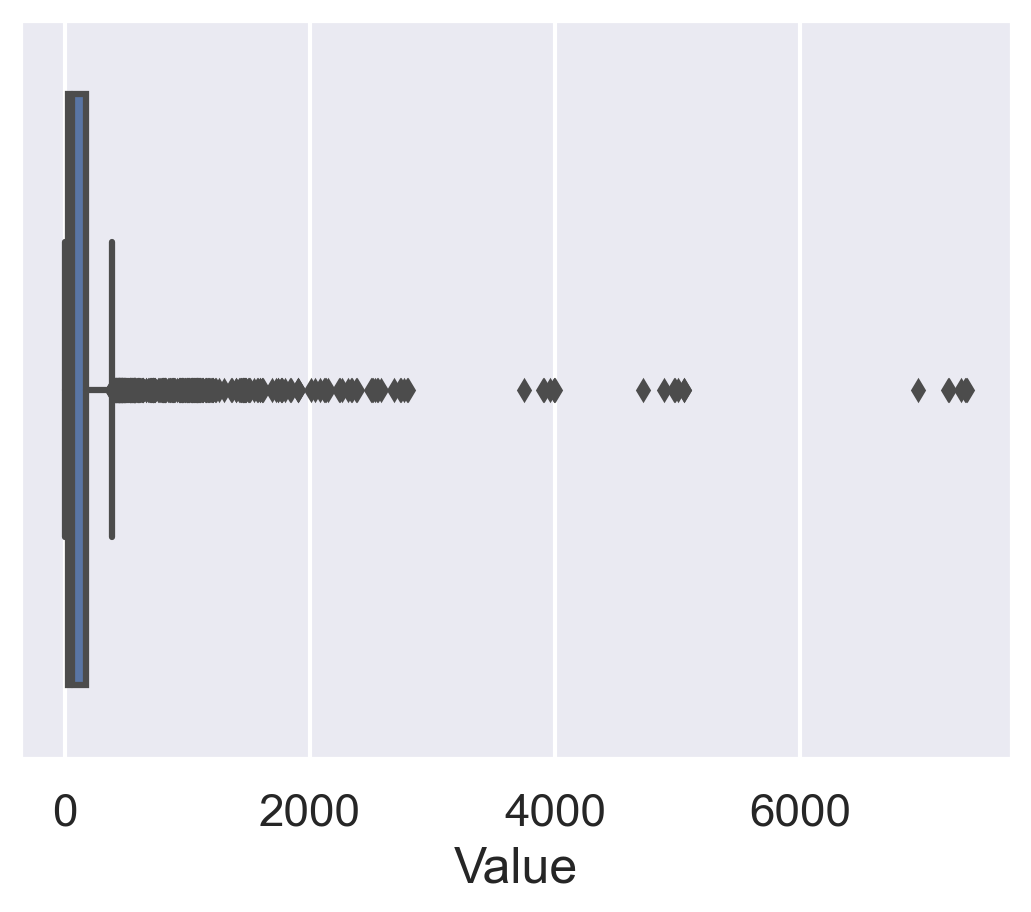

In [197]:
sns.boxplot(x=df_cattle["Value"], whis=1.5)  

In [198]:
import geopandas as gpd
ROI_map= gpd.read_file('IRL_adm1.shp')  #reading the map 
ROI_map.NAME_1 #you can see names of counties here


0        Carlow
1         Cavan
2         Clare
3          Cork
4       Donegal
5        Dublin
6        Galway
7         Kerry
8       Kildare
9      Kilkenny
10     Laoighis
11      Leitrim
12     Limerick
13     Longford
14        Louth
15         Mayo
16        Meath
17     Monaghan
18       Offaly
19    Roscommon
20        Sligo
21    Tipperary
22    Waterford
23    Westmeath
24      Wexford
25      Wicklow
Name: NAME_1, dtype: object

In [199]:
ROI_map.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,109,IRL,Ireland,1,Carlow,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
1,109,IRL,Ireland,2,Cavan,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377..."
2,109,IRL,Ireland,3,Clare,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
3,109,IRL,Ireland,4,Cork,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
4,109,IRL,Ireland,5,Donegal,Administrative County,County,None,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55..."


In [200]:
ROI_map=ROI_map.set_index('NAME_1')
df_cattle=df_cattle.set_index('County')
df2=ROI_map.join(df_cattle)
# we need to replace NaN rows with 0 since there are some counties #without any wind turbines 
df2['Value']=df2['Value'].fillna(value=0)
df2['Year']=df2['Year'].fillna(value=0)
df2['name1'] =df2.index
df2.head() # it is the new data frame that we created merging map and wind data sets

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Year,Type of Cattle,Value,name1
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2015.0,Total cattle,100.0,Carlow
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2015.0,Cows,30.3,Carlow
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2015.0,Dairy cows,12.9,Carlow
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2015.0,Other cows,17.3,Carlow
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730...",2015.0,Bulls,0.8,Carlow


In [201]:
df2['Year'] = df2['Year'].astype(int)  

In [202]:
ROI_map.head()

,ID_0,ISO,NAME_0,ID_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
NAME_1,,,,,,,,,
Carlow,109,IRL,Ireland,1,Administrative County,County,None,Ceatharlach,"POLYGON ((-6.59242 52.70810, -6.59292 52.70730..."
Cavan,109,IRL,Ireland,2,Administrative County,County,None,An Cabhán,"POLYGON ((-7.27517 53.78388, -7.27538 53.78377..."
Clare,109,IRL,Ireland,3,Administrative County,County,None,An Clár,"MULTIPOLYGON (((-9.04528 52.71819, -9.04528 52..."
Cork,109,IRL,Ireland,4,Traditional County,County,None,Corcaigh,"MULTIPOLYGON (((-10.16361 51.57986, -10.16528 ..."
Donegal,109,IRL,Ireland,5,Administrative County,County,None,Dún na nGall|Tyrconnel,"MULTIPOLYGON (((-7.24083 55.44958, -7.24078 55..."


(-10.896526646614074, -5.76013867855072, 51.218040657043574, 55.65195827484136)

Text(0.9, 0.65, 'Value')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-6.776785101084613, 52.68874931335449, 'Carlow')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-7.308941421063959, 54.032487869262695, 'Cavan')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.928382761998394, 52.85722160339361, 'Clare')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-8.5986359119415, 51.91430664062497, 'Cork')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-7.951642791896906, 54.9214000701904, 'Donegal')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-6.262619648232395, 53.41847229003906, 'Dublin')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-8.874240706942242, 53.34194374084473, 'Galway')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-10.175278186798067, 52.1552791595459, 'Kerry')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-6.812728736302944, 53.17651557922366, 'Kildare')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.161406416008604, 52.56553459167486, 'Kilkenny')

Text(-7.36120748519896, 52.99671363830575, 'Laoighis')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.101502694040096, 54.15067291259771, 'Leitrim')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-8.811543754136625, 52.50043678283694, 'Limerick')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-7.686563157865924, 53.72647666931152, 'Longford')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-6.518146764169813, 53.92030525207525, 'Louth')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-9.214705753417206, 53.91642379760748, 'Mayo')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.588626773140619, 53.63861083984381, 'Meath')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-6.939293914952137, 54.16016578674322, 'Monaghan')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-7.812120998999174, 53.13793754577645, 'Offaly')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.210845371152809, 53.68411445617676, 'Roscommon')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-8.730097555112419, 54.19114875793463, 'Sligo')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.872687927935701, 52.6908931732178, 'Tipperary')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.638562284012544, 52.146944046020565, 'Waterford')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-7.310206637659367, 53.55724525451657, 'Westmeath')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.595902556109495, 52.46041679382327, 'Wexford')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

Text(-6.370259289703188, 52.95694351196292, 'Wicklow')

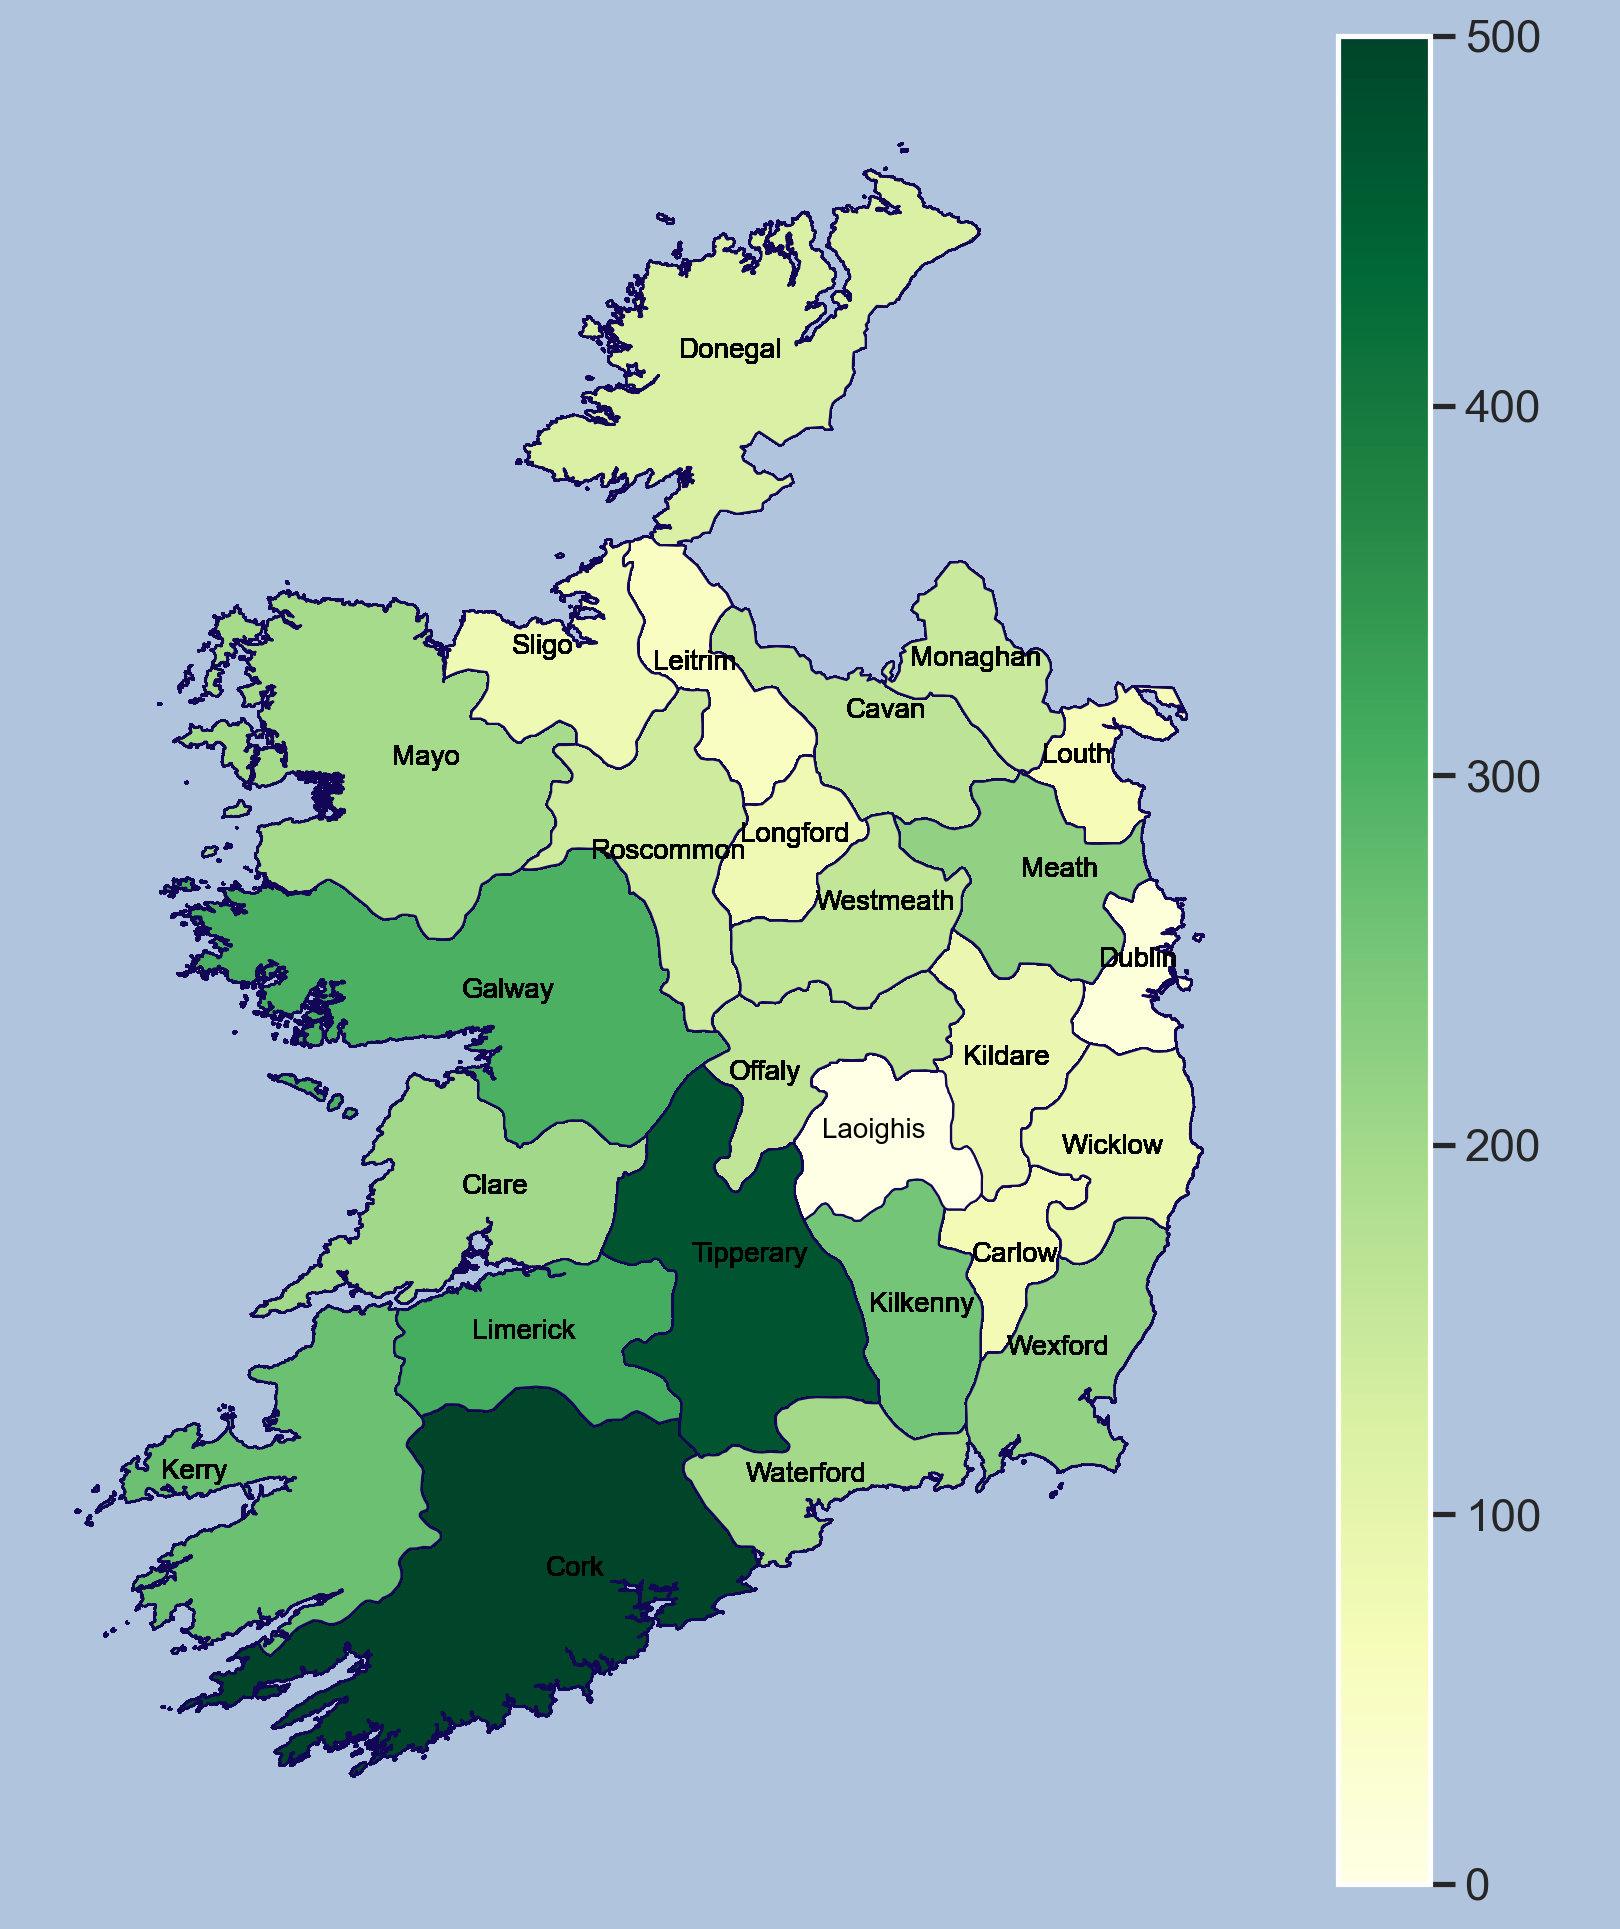

In [203]:
MAP=df2
variable = 'Value'
vmin, vmax = 0, 500
fig, ax = plt.subplots(figsize=(10,12),facecolor='lightsteelblue')
fig=MAP.plot(column='Value', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='#140656',facecolor='lightslategray',vmin=vmin, vmax=vmax,
                 legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
ax.axis('off')
ax.annotate('Value',xy=(0.9, .65),rotation=270, xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='black')
#Getting the lan and lat here from geometry data    
MAP['coords']=MAP['geometry'].apply(lambda x: x.representative_point().coords[:])
MAP['coords']=[coords[0] for coords in MAP['coords']]
#Add names of county here
for idx, row in MAP.iterrows():
    plt.annotate(text=row['name1'], xy=row['coords'], horizontalalignment='center', color='black', fontsize=10, fontweight='light');





